# Analysis for Reproducibility

In [1]:
#Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading dataset for MiXCR

In [2]:
# Directories containing the TSV files
original_directory = '/scratch1/pjaiswal/MIXCR/Public_og/results/clones_tsv/merged_files/common_samples'
shuffled_directory = '/scratch1/pjaiswal/MIXCR/Public_resort/merged_files/common_samples'

# Initialize an empty list to store the names of the DataFrames
original_dataframe_names = []
shuffled_dataframe_names = []

# Function to load TSV files and create DataFrames
def load_tsv_files(directory, dataframe_names):
    for filename in os.listdir(directory):
        if filename.endswith('.tsv'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            # Create a DataFrame name by removing '.tsv' and replacing '-' with '_'
            df_name = filename.replace('.tsv', '').replace('-', '_').replace('.', '_')
            # Load the TSV file into a pandas DataFrame and assign it to the dynamically created variable
            globals()[df_name] = pd.read_csv(file_path, sep='\t',low_memory = False)
            # Append the DataFrame name to the list
            dataframe_names.append(df_name)

# Load original TSV files
load_tsv_files(original_directory, original_dataframe_names)

# Load shuffled TSV files
load_tsv_files(shuffled_directory, shuffled_dataframe_names)

# Print the names of the loaded DataFrames
print("Loaded Original DataFrames:")
for name in original_dataframe_names:
    print(name)

print("\nLoaded Shuffled DataFrames:")
for name in shuffled_dataframe_names:
    print(name)

Loaded Original DataFrames:
SRR5812661_original_MIXCR
SRR5812630_original_MIXCR
SRR5812681_original_MIXCR
SRR5812623_original_MIXCR
SRR5812672_original_MIXCR
SRR5812653_original_MIXCR
SRR5812647_original_MIXCR
SRR5812679_original_MIXCR
SRR5812616_original_MIXCR
SRR5812628_original_MIXCR
SRR5812658_original_MIXCR
SRR5812666_original_MIXCR
SRR5812637_original_MIXCR
SRR5812654_original_MIXCR
SRR5812624_original_MIXCR
SRR5812675_original_MIXCR
SRR5812686_original_MIXCR
SRR5812632_original_MIXCR
SRR5812613_original_MIXCR
SRR5812642_original_MIXCR
SRR5812683_original_MIXCR
SRR5812670_original_MIXCR
SRR5812614_original_MIXCR
SRR5812645_original_MIXCR
SRR5812635_original_MIXCR
SRR5812664_original_MIXCR
SRR5812656_original_MIXCR
SRR5812668_original_MIXCR
SRR5812639_original_MIXCR
SRR5812649_original_MIXCR
SRR5812677_original_MIXCR
SRR5812618_original_MIXCR
SRR5812626_original_MIXCR
SRR5812684_original_MIXCR
SRR5812634_original_MIXCR
SRR5812665_original_MIXCR
SRR5812615_original_MIXCR
SRR5812644

# Loading dataset from TRUST4

In [3]:
# Loading dataset from TRUST4
# Directories containing the TSV files
original_directory_1 = '/scratch1/pjaiswal/TRUST4_results/Public_data/original_fastq/clones_tsv/common_samples'
shuffled_directory_1 = '/scratch1/pjaiswal/TRUST4_results/Public_data/resort/clones_tsv/common_samples'

# Initialize an empty list to store the names of the DataFrames
original_dataframe_names_1 = []
shuffled_dataframe_names_1 = []

# Function to load TSV files and create DataFrames
def load_tsv_files_1(directory, dataframe_names):
    for filename in os.listdir(directory):
        if filename.endswith('.tsv'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            # Create a DataFrame name by removing '.tsv' and replacing '-' with '_'
            df_name = filename.replace('.tsv', '').replace('-', '_').replace('.', '_')
            # Load the TSV file into a pandas DataFrame and assign it to the dynamically created variable
            globals()[df_name] = pd.read_csv(file_path, sep='\t', low_memory=False)
            # Append the DataFrame name to the list
            dataframe_names.append(df_name)

# Load original TSV files
load_tsv_files(original_directory_1, original_dataframe_names_1)

# Load shuffled TSV files
load_tsv_files(shuffled_directory_1, shuffled_dataframe_names_1)

# Print the names of the loaded DataFrames
print("Loaded Original DataFrames:")
for name in original_dataframe_names_1:
    print(name)

print("\nLoaded Shuffled DataFrames:")
for name in shuffled_dataframe_names_1:
    print(name)

Loaded Original DataFrames:
SRR5812630_original_TRUST4
SRR5812665_original_TRUST4
SRR5812678_original_TRUST4
SRR5812687_original_TRUST4
SRR5812662_original_TRUST4
SRR5812637_original_TRUST4
SRR5812680_original_TRUST4
SRR5812623_original_TRUST4
SRR5812676_original_TRUST4
SRR5812671_original_TRUST4
SRR5812624_original_TRUST4
SRR5812639_original_TRUST4
SRR5812644_original_TRUST4
SRR5812659_original_TRUST4
SRR5812616_original_TRUST4
SRR5812657_original_TRUST4
SRR5812618_original_TRUST4
SRR5812650_original_TRUST4
SRR5812672_original_TRUST4
SRR5812627_original_TRUST4
SRR5812620_original_TRUST4
SRR5812668_original_TRUST4
SRR5812675_original_TRUST4
SRR5812661_original_TRUST4
SRR5812629_original_TRUST4
SRR5812634_original_TRUST4
SRR5812683_original_TRUST4
SRR5812633_original_TRUST4
SRR5812666_original_TRUST4
SRR5812684_original_TRUST4
SRR5812653_original_TRUST4
SRR5812649_original_TRUST4
SRR5812654_original_TRUST4
SRR5812615_original_TRUST4
SRR5812647_original_TRUST4
SRR5812612_original_TRUST4


# Function for finding the shared sequences between original and resorted files for MIXCR and calculating %Clonotype reused

In [9]:
# Function to perform analysis on a pair of original and shuffled DataFrames
def analyze_pair(original_df_name, shuffled_df_name, column_name='nSeqCDR3'):
    original_df = globals()[original_df_name]
    shuffled_df = globals()[shuffled_df_name]
    
    unique_values_file1 = original_df[column_name]
    unique_values_file2 = shuffled_df[column_name]
    
    # Find unique values between the two columns
    unique_values_between_files = set(unique_values_file1) ^ set(unique_values_file2)
    
    # Find the shared CDR3 sequences
    shared_seq = set(unique_values_file1) & set(unique_values_file2)
    
    # %clonotypes reused based on shared sequences
    percent_clonotype_reused = len(shared_seq) / len(set(unique_values_file1)) * 100
    
    print(f"Analysis for {original_df_name} and {shuffled_df_name}:")
    print("Number of clonotypes in the original file: ", len(set(unique_values_file1)))
    print("Number of clonotypes in the shuffled file: ", len(set(unique_values_file2)))
    print("Number of shared clonotypes: ", len(shared_seq))
    print("%clonotype reused:", percent_clonotype_reused)
    print("Number of unique clonotypes:", len(unique_values_between_files))
    print("\n")
    
    return {
        'Sample': original_df_name.replace('_original_MIXCR', ''),
        '%Clonotype_Reused_MIXCR': percent_clonotype_reused,
        'Total_Clonotypes_Original': len(set(unique_values_file1)),
        'Total_Clonotypes_Shuffled': len(set(unique_values_file2)),
        'Total_Shared_Clonotypes': len(shared_seq)
    }

# Mapping of original and shuffled DataFrames
pairs = {
    'SRR5812610_original_MIXCR': 'SRR5812610_shuffled_MIXCR',
    'SRR5812612_original_MIXCR': 'SRR5812612_shuffled_MIXCR',
    'SRR5812613_original_MIXCR': 'SRR5812613_shuffled_MIXCR',
    'SRR5812614_original_MIXCR': 'SRR5812614_shuffled_MIXCR',
    'SRR5812615_original_MIXCR': 'SRR5812615_shuffled_MIXCR',
    'SRR5812616_original_MIXCR': 'SRR5812616_shuffled_MIXCR',
    'SRR5812617_original_MIXCR': 'SRR5812617_shuffled_MIXCR',
    'SRR5812618_original_MIXCR': 'SRR5812618_shuffled_MIXCR',
    'SRR5812619_original_MIXCR': 'SRR5812619_shuffled_MIXCR',
    'SRR5812620_original_MIXCR': 'SRR5812620_shuffled_MIXCR',
    'SRR5812622_original_MIXCR': 'SRR5812622_shuffled_MIXCR',
    'SRR5812623_original_MIXCR': 'SRR5812623_shuffled_MIXCR',
    'SRR5812624_original_MIXCR': 'SRR5812624_shuffled_MIXCR',
    'SRR5812625_original_MIXCR': 'SRR5812625_shuffled_MIXCR',
    'SRR5812626_original_MIXCR': 'SRR5812626_shuffled_MIXCR',
    'SRR5812627_original_MIXCR': 'SRR5812627_shuffled_MIXCR',
    'SRR5812628_original_MIXCR': 'SRR5812628_shuffled_MIXCR',
    'SRR5812629_original_MIXCR': 'SRR5812629_shuffled_MIXCR',
    'SRR5812630_original_MIXCR': 'SRR5812630_shuffled_MIXCR',
    'SRR5812631_original_MIXCR': 'SRR5812631_shuffled_MIXCR',
    'SRR5812632_original_MIXCR': 'SRR5812632_shuffled_MIXCR',
    'SRR5812633_original_MIXCR': 'SRR5812633_shuffled_MIXCR',
    'SRR5812634_original_MIXCR': 'SRR5812634_shuffled_MIXCR',
    'SRR5812635_original_MIXCR': 'SRR5812635_shuffled_MIXCR',
    'SRR5812636_original_MIXCR': 'SRR5812636_shuffled_MIXCR',
    'SRR5812637_original_MIXCR': 'SRR5812637_shuffled_MIXCR',
    'SRR5812638_original_MIXCR': 'SRR5812638_shuffled_MIXCR',
    'SRR5812639_original_MIXCR': 'SRR5812639_shuffled_MIXCR',
    'SRR5812641_original_MIXCR': 'SRR5812641_shuffled_MIXCR',
    'SRR5812642_original_MIXCR': 'SRR5812642_shuffled_MIXCR',
    'SRR5812644_original_MIXCR': 'SRR5812644_shuffled_MIXCR',
    'SRR5812645_original_MIXCR': 'SRR5812645_shuffled_MIXCR',
    'SRR5812646_original_MIXCR': 'SRR5812646_shuffled_MIXCR',
    'SRR5812647_original_MIXCR': 'SRR5812647_shuffled_MIXCR',
    'SRR5812648_original_MIXCR': 'SRR5812648_shuffled_MIXCR',
    'SRR5812649_original_MIXCR': 'SRR5812649_shuffled_MIXCR',
    'SRR5812650_original_MIXCR': 'SRR5812650_shuffled_MIXCR',
    'SRR5812653_original_MIXCR': 'SRR5812653_shuffled_MIXCR',
    'SRR5812654_original_MIXCR': 'SRR5812654_shuffled_MIXCR',
    'SRR5812655_original_MIXCR': 'SRR5812655_shuffled_MIXCR',
    'SRR5812656_original_MIXCR': 'SRR5812656_shuffled_MIXCR',
    'SRR5812657_original_MIXCR': 'SRR5812657_shuffled_MIXCR',
    'SRR5812658_original_MIXCR': 'SRR5812658_shuffled_MIXCR',
    'SRR5812659_original_MIXCR': 'SRR5812659_shuffled_MIXCR',
    'SRR5812660_original_MIXCR': 'SRR5812660_shuffled_MIXCR',
    'SRR5812661_original_MIXCR': 'SRR5812661_shuffled_MIXCR',
    'SRR5812662_original_MIXCR': 'SRR5812662_shuffled_MIXCR',
    'SRR5812664_original_MIXCR': 'SRR5812664_shuffled_MIXCR',
    'SRR5812665_original_MIXCR': 'SRR5812665_shuffled_MIXCR',
    'SRR5812666_original_MIXCR': 'SRR5812666_shuffled_MIXCR',
    'SRR5812667_original_MIXCR': 'SRR5812667_shuffled_MIXCR',
    'SRR5812668_original_MIXCR': 'SRR5812668_shuffled_MIXCR',
    'SRR5812669_original_MIXCR': 'SRR5812669_shuffled_MIXCR',
    'SRR5812670_original_MIXCR': 'SRR5812670_shuffled_MIXCR',
    'SRR5812671_original_MIXCR': 'SRR5812671_shuffled_MIXCR',
    'SRR5812672_original_MIXCR': 'SRR5812672_shuffled_MIXCR',
    'SRR5812673_original_MIXCR': 'SRR5812673_shuffled_MIXCR',
    'SRR5812674_original_MIXCR': 'SRR5812674_shuffled_MIXCR',
    'SRR5812675_original_MIXCR': 'SRR5812675_shuffled_MIXCR',
    'SRR5812676_original_MIXCR': 'SRR5812676_shuffled_MIXCR',
    'SRR5812677_original_MIXCR': 'SRR5812677_shuffled_MIXCR',
    'SRR5812678_original_MIXCR': 'SRR5812678_shuffled_MIXCR',
    'SRR5812679_original_MIXCR': 'SRR5812679_shuffled_MIXCR',
    'SRR5812680_original_MIXCR': 'SRR5812680_shuffled_MIXCR',
    'SRR5812681_original_MIXCR': 'SRR5812681_shuffled_MIXCR',
    'SRR5812682_original_MIXCR': 'SRR5812682_shuffled_MIXCR',
    'SRR5812683_original_MIXCR': 'SRR5812683_shuffled_MIXCR',
    'SRR5812684_original_MIXCR': 'SRR5812684_shuffled_MIXCR',
    'SRR5812686_original_MIXCR': 'SRR5812686_shuffled_MIXCR',
    'SRR5812687_original_MIXCR': 'SRR5812687_shuffled_MIXCR'
}
# Perform analysis for each pair and collect results
results = []
for original_name, shuffled_name in pairs.items():
    result = analyze_pair(original_name, shuffled_name)
    results.append(result)

# Create a DataFrame from the results
results_df_MIXCR = pd.DataFrame(results)

# Display the DataFrame
print(results_df_MIXCR)

Analysis for SRR5812610_original_MIXCR and SRR5812610_shuffled_MIXCR:
Number of clonotypes in the original file:  41413
Number of clonotypes in the shuffled file:  41413
Number of shared clonotypes:  41413
%clonotype reused: 100.0
Number of unique clonotypes: 0


Analysis for SRR5812612_original_MIXCR and SRR5812612_shuffled_MIXCR:
Number of clonotypes in the original file:  30487
Number of clonotypes in the shuffled file:  30487
Number of shared clonotypes:  30487
%clonotype reused: 100.0
Number of unique clonotypes: 0


Analysis for SRR5812613_original_MIXCR and SRR5812613_shuffled_MIXCR:
Number of clonotypes in the original file:  329400
Number of clonotypes in the shuffled file:  329400
Number of shared clonotypes:  329400
%clonotype reused: 100.0
Number of unique clonotypes: 0


Analysis for SRR5812614_original_MIXCR and SRR5812614_shuffled_MIXCR:
Number of clonotypes in the original file:  362313
Number of clonotypes in the shuffled file:  362313
Number of shared clonotypes:  362

In [11]:
results_df_MIXCR
results_df_MIXCR.to_csv("/scratch1/pjaiswal/ipynb_notebooks/%Clonotypes Reused in Public dataset.csv", index=False)

# Function for calculating %clonotype reused for TRUST4

In [12]:
# Function to perform analysis on a pair of original and shuffled DataFrames
def analyze_pair(original_df_name, shuffled_df_name, column_name='CDR3nt'):
    original_df = globals()[original_df_name]
    shuffled_df = globals()[shuffled_df_name]
    
    unique_values_file1 = original_df[column_name]
    unique_values_file2 = shuffled_df[column_name]
    
    # Find unique values between the two columns
    unique_values_between_files = set(unique_values_file1) ^ set(unique_values_file2)
    
    # Find the shared CDR3 sequences
    shared_seq = set(unique_values_file1) & set(unique_values_file2)
    
    # %clonotypes reused based on shared sequences
    percent_clonotype_reused = len(shared_seq) / len(set(unique_values_file1)) * 100
    
    print(f"Analysis for {original_df_name} and {shuffled_df_name}:")
    print("Number of clonotypes in the original file: ", len(set(unique_values_file1)))
    print("Number of clonotypes in the shuffled file: ", len(set(unique_values_file2)))
    print("Number of shared clonotypes: ", len(shared_seq))
    print("%clonotype reused:", percent_clonotype_reused)
    print("Number of unique clonotypes:", len(unique_values_between_files))
    print("\n")
    
    return {
        'Sample': original_df_name.replace('_original_TRUST4', ''),
        '%Clonotype_Reused_TRUST4': percent_clonotype_reused,
        'Total_Clonotypes_Original': len(set(unique_values_file1)),
        'Total_Clonotypes_Shuffled': len(set(unique_values_file2)),
        'Total_Shared_Clonotypes': len(shared_seq)
    }

# Mapping of original and shuffled DataFrames
pairs = {
    'SRR5812610_original_TRUST4': 'SRR5812610_shuffle_TRUST4',
    'SRR5812612_original_TRUST4': 'SRR5812612_shuffle_TRUST4',
    'SRR5812613_original_TRUST4': 'SRR5812613_shuffle_TRUST4',
    'SRR5812614_original_TRUST4': 'SRR5812614_shuffle_TRUST4',
    'SRR5812615_original_TRUST4': 'SRR5812615_shuffle_TRUST4',
    'SRR5812616_original_TRUST4': 'SRR5812616_shuffle_TRUST4',
    'SRR5812617_original_TRUST4': 'SRR5812617_shuffle_TRUST4',
    'SRR5812618_original_TRUST4': 'SRR5812618_shuffle_TRUST4',
    'SRR5812619_original_TRUST4': 'SRR5812619_shuffle_TRUST4',
    'SRR5812620_original_TRUST4': 'SRR5812620_shuffle_TRUST4',
    'SRR5812622_original_TRUST4': 'SRR5812622_shuffle_TRUST4',
    'SRR5812623_original_TRUST4': 'SRR5812623_shuffle_TRUST4',
    'SRR5812624_original_TRUST4': 'SRR5812624_shuffle_TRUST4',
    'SRR5812625_original_TRUST4': 'SRR5812625_shuffle_TRUST4',
    'SRR5812626_original_TRUST4': 'SRR5812626_shuffle_TRUST4',
    'SRR5812627_original_TRUST4': 'SRR5812627_shuffle_TRUST4',
    'SRR5812628_original_TRUST4': 'SRR5812628_shuffle_TRUST4',
    'SRR5812629_original_TRUST4': 'SRR5812629_shuffle_TRUST4',
    'SRR5812630_original_TRUST4': 'SRR5812630_shuffle_TRUST4',
    'SRR5812631_original_TRUST4': 'SRR5812631_shuffle_TRUST4',
    'SRR5812632_original_TRUST4': 'SRR5812632_shuffle_TRUST4',
    'SRR5812633_original_TRUST4': 'SRR5812633_shuffle_TRUST4',
    'SRR5812634_original_TRUST4': 'SRR5812634_shuffle_TRUST4',
    'SRR5812635_original_TRUST4': 'SRR5812635_shuffle_TRUST4',
    'SRR5812637_original_TRUST4': 'SRR5812637_shuffle_TRUST4',
    'SRR5812638_original_TRUST4': 'SRR5812638_shuffle_TRUST4',
    'SRR5812639_original_TRUST4': 'SRR5812639_shuffle_TRUST4',
    'SRR5812641_original_TRUST4': 'SRR5812641_shuffle_TRUST4',
    'SRR5812642_original_TRUST4': 'SRR5812642_shuffle_TRUST4',
    'SRR5812644_original_TRUST4': 'SRR5812644_shuffle_TRUST4',
    'SRR5812645_original_TRUST4': 'SRR5812645_shuffle_TRUST4',
    'SRR5812646_original_TRUST4': 'SRR5812646_shuffle_TRUST4',
    'SRR5812647_original_TRUST4': 'SRR5812647_shuffle_TRUST4',
    'SRR5812648_original_TRUST4': 'SRR5812648_shuffle_TRUST4',
    'SRR5812649_original_TRUST4': 'SRR5812649_shuffle_TRUST4',
    'SRR5812650_original_TRUST4': 'SRR5812650_shuffle_TRUST4',
    'SRR5812653_original_TRUST4': 'SRR5812653_shuffle_TRUST4',
    'SRR5812654_original_TRUST4': 'SRR5812654_shuffle_TRUST4',
    'SRR5812655_original_TRUST4': 'SRR5812655_shuffle_TRUST4',
    'SRR5812656_original_TRUST4': 'SRR5812656_shuffle_TRUST4',
    'SRR5812657_original_TRUST4': 'SRR5812657_shuffle_TRUST4',
    'SRR5812658_original_TRUST4': 'SRR5812658_shuffle_TRUST4',
    'SRR5812659_original_TRUST4': 'SRR5812659_shuffle_TRUST4',
    'SRR5812660_original_TRUST4': 'SRR5812660_shuffle_TRUST4',
    'SRR5812661_original_TRUST4': 'SRR5812661_shuffle_TRUST4',
    'SRR5812662_original_TRUST4': 'SRR5812662_shuffle_TRUST4',
    'SRR5812664_original_TRUST4': 'SRR5812664_shuffle_TRUST4',
    'SRR5812665_original_TRUST4': 'SRR5812665_shuffle_TRUST4',
    'SRR5812666_original_TRUST4': 'SRR5812666_shuffle_TRUST4',
    'SRR5812667_original_TRUST4': 'SRR5812667_shuffle_TRUST4',
    'SRR5812668_original_TRUST4': 'SRR5812668_shuffle_TRUST4',
    'SRR5812670_original_TRUST4': 'SRR5812670_shuffle_TRUST4',
    'SRR5812671_original_TRUST4': 'SRR5812671_shuffle_TRUST4',
    'SRR5812672_original_TRUST4': 'SRR5812672_shuffle_TRUST4',
    'SRR5812673_original_TRUST4': 'SRR5812673_shuffle_TRUST4',
    'SRR5812674_original_TRUST4': 'SRR5812674_shuffle_TRUST4',
    'SRR5812675_original_TRUST4': 'SRR5812675_shuffle_TRUST4',
    'SRR5812676_original_TRUST4': 'SRR5812676_shuffle_TRUST4',
    'SRR5812677_original_TRUST4': 'SRR5812677_shuffle_TRUST4',
    'SRR5812678_original_TRUST4': 'SRR5812678_shuffle_TRUST4',
    'SRR5812679_original_TRUST4': 'SRR5812679_shuffle_TRUST4',
    'SRR5812680_original_TRUST4': 'SRR5812680_shuffle_TRUST4',
    'SRR5812681_original_TRUST4': 'SRR5812681_shuffle_TRUST4',
    'SRR5812682_original_TRUST4': 'SRR5812682_shuffle_TRUST4',
    'SRR5812683_original_TRUST4': 'SRR5812683_shuffle_TRUST4',
    'SRR5812684_original_TRUST4': 'SRR5812684_shuffle_TRUST4',
    'SRR5812687_original_TRUST4': 'SRR5812687_shuffle_TRUST4'
}
# Perform analysis for each pair and collect results
results = []
for original_name, shuffled_name in pairs.items():
    result = analyze_pair(original_name, shuffled_name)
    results.append(result)

# Create a DataFrame from the results
results_df_TRUST4 = pd.DataFrame(results)

# Display the DataFrame
print(results_df_TRUST4)

Analysis for SRR5812610_original_TRUST4 and SRR5812610_shuffle_TRUST4:
Number of clonotypes in the original file:  276246
Number of clonotypes in the shuffled file:  276247
Number of shared clonotypes:  276245
%clonotype reused: 99.9996380038082
Number of unique clonotypes: 3


Analysis for SRR5812612_original_TRUST4 and SRR5812612_shuffle_TRUST4:
Number of clonotypes in the original file:  90231
Number of clonotypes in the shuffled file:  90231
Number of shared clonotypes:  90228
%clonotype reused: 99.99667520031919
Number of unique clonotypes: 6


Analysis for SRR5812613_original_TRUST4 and SRR5812613_shuffle_TRUST4:
Number of clonotypes in the original file:  457850
Number of clonotypes in the shuffled file:  457852
Number of shared clonotypes:  457849
%clonotype reused: 99.99978158785629
Number of unique clonotypes: 4


Analysis for SRR5812614_original_TRUST4 and SRR5812614_shuffle_TRUST4:
Number of clonotypes in the original file:  453307
Number of clonotypes in the shuffled file:

In [13]:
results_df_TRUST4.to_csv("/scratch1/pjaiswal/ipynb_notebooks/%Clonotypes Reused in Public dataset TRUST4.csv", index=False)
results_df_TRUST4

,Sample,%Clonotype_Reused_TRUST4,Total_Clonotypes_Original,Total_Clonotypes_Shuffled,Total_Shared_Clonotypes
0,SRR5812610,99.999638,276246,276247,276245
1,SRR5812612,99.996675,90231,90231,90228
2,SRR5812613,99.999782,457850,457852,457849
3,SRR5812614,99.997573,453307,453307,453296
4,SRR5812615,100.000000,14295,14295,14295
...,...,...,...,...,...
62,SRR5812681,100.000000,345785,345785,345785
63,SRR5812682,100.000000,531137,531137,531137
64,SRR5812683,99.924625,238805,238789,238625
65,SRR5812684,99.963866,130070,130067,130023


In [15]:
results_df_TRUST4.columns

Index(['Sample', '%Clonotype_Reused_TRUST4', 'Total_Clonotypes_Original',
       'Total_Clonotypes_Shuffled', 'Total_Shared_Clonotypes'],
      dtype='object')

# Plots and Figures

## %clonotype reused

In [17]:
percent_consistency_clonotypes_reused = pd.merge(results_df_TRUST4[['Sample', '%Clonotype_Reused_TRUST4']],
                     results_df_MIXCR[['Sample', '%Clonotype_Reused_MIXCR']],
                     on='Sample')

# Display the merged DataFrame
print(percent_consistency_clonotypes_reused)

        Sample  %Clonotype_Reused_TRUST4  %Clonotype_Reused_MIXCR
0   SRR5812610                 99.999638                    100.0
1   SRR5812612                 99.996675                    100.0
2   SRR5812613                 99.999782                    100.0
3   SRR5812614                 99.997573                    100.0
4   SRR5812615                100.000000                    100.0
..         ...                       ...                      ...
62  SRR5812681                100.000000                    100.0
63  SRR5812682                100.000000                    100.0
64  SRR5812683                 99.924625                    100.0
65  SRR5812684                 99.963866                    100.0
66  SRR5812687                 99.999051                    100.0

[67 rows x 3 columns]


In [18]:
percent_consistency_clonotypes_reused.to_csv("/scratch1/pjaiswal/ipynb_notebooks/percent_consistency_public.csv", index=False)

In [19]:
df_long = pd.melt(percent_consistency_clonotypes_reused, id_vars=['Sample'], value_vars=['%Clonotype_Reused_MIXCR', '%Clonotype_Reused_TRUST4'],
                  var_name='Tool', value_name='%Clonotype_Reused')

In [20]:
df_long

,Sample,Tool,%Clonotype_Reused
0,SRR5812610,%Clonotype_Reused_MIXCR,100.000000
1,SRR5812612,%Clonotype_Reused_MIXCR,100.000000
2,SRR5812613,%Clonotype_Reused_MIXCR,100.000000
3,SRR5812614,%Clonotype_Reused_MIXCR,100.000000
4,SRR5812615,%Clonotype_Reused_MIXCR,100.000000
...,...,...,...
129,SRR5812681,%Clonotype_Reused_TRUST4,100.000000
130,SRR5812682,%Clonotype_Reused_TRUST4,100.000000
131,SRR5812683,%Clonotype_Reused_TRUST4,99.924625
132,SRR5812684,%Clonotype_Reused_TRUST4,99.963866


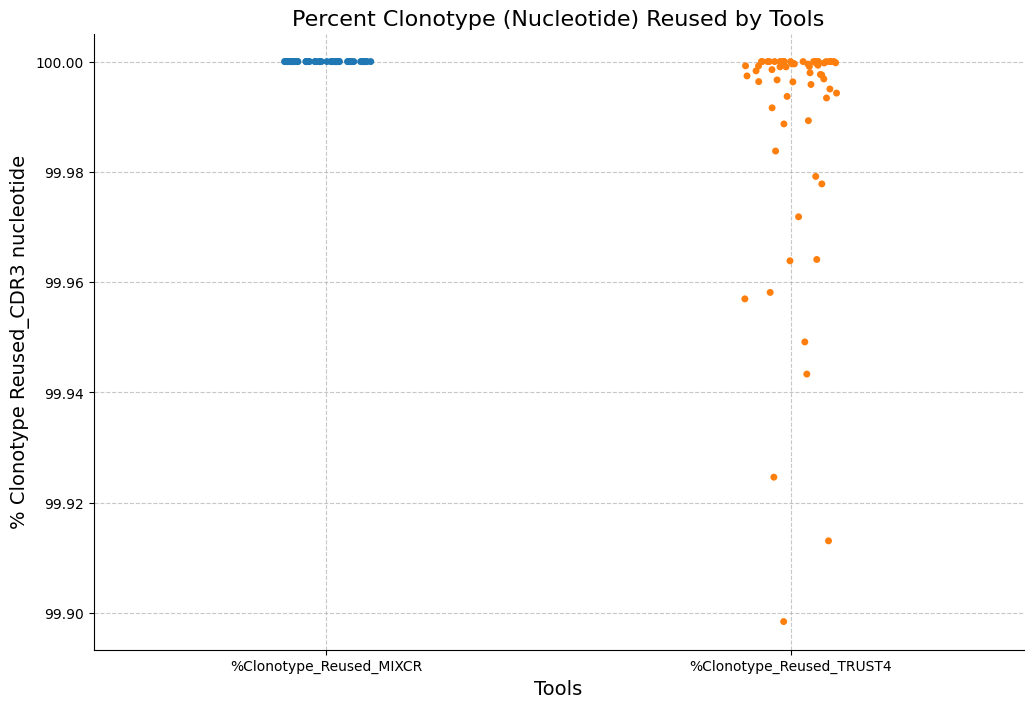

In [24]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='Tool', y='%Clonotype_Reused', data=df_long, hue='Tool', jitter=True)
plt.title('Percent Clonotype (Nucleotide) Reused by Tools', fontsize=16)
plt.xlabel('Tools', fontsize=14)
plt.ylabel('% Clonotype Reused_CDR3 nucleotide', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.savefig('/scratch1/pjaiswal/ipynb_notebooks/Figures/Percent_Clonotype_Public.pdf', dpi=300)
plt.show()

In [12]:
df_long

,Sample,Tool,%Clonotype_Reused
0,SRR5812610,MIXCR,100.000000
1,SRR5812612,MIXCR,100.000000
2,SRR5812613,MIXCR,100.000000
3,SRR5812614,MIXCR,100.000000
4,SRR5812615,MIXCR,100.000000
...,...,...,...
129,SRR5812681,TRUST4,100.000000
130,SRR5812682,TRUST4,100.000000
131,SRR5812683,TRUST4,99.924625
132,SRR5812684,TRUST4,99.963866


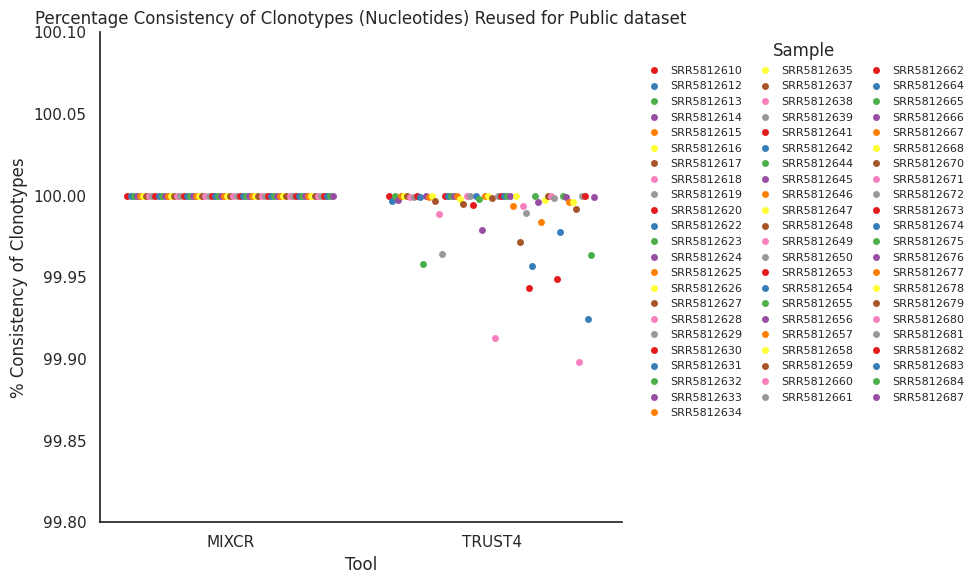

In [31]:
df_long = pd.melt(percent_consistency_clonotypes_reused, id_vars=['Sample'], value_vars=['%Clonotype_Reused_MIXCR', '%Clonotype_Reused_TRUST4'],
                  var_name='Tool', value_name='%Clonotype_Reused')

# Replace tool names for better visualization
df_long['Tool'] = df_long['Tool'].str.replace('%Clonotype_Reused_', '')

# Plot the stripplot with enhancements
plt.figure(figsize=(10, 6))

# Create the stripplot
plt.style.use(['ggplot', 'seaborn-v0_8-white'])
sns.set_style("white")
sns.set_context("notebook")
ax = sns.stripplot(x='Tool', y='%Clonotype_Reused', data=df_long, jitter=True, palette='Set1', dodge=True, hue='Sample')

# Set titles and labels
plt.title('Percentage Consistency of Clonotypes (Nucleotides) Reused for Public dataset', fontsize=12, loc='center')
plt.xlabel('Tool', fontsize=12)
plt.ylabel('% Consistency of Clonotypes', fontsize=12)
plt.ylim(99.8, 100.1)

# Add legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='Sample', title_fontsize='12', fontsize='8', ncol=3, handletextpad=0.5, columnspacing=1, frameon=False)


plt.tight_layout()
sns.despine()
plt.savefig('/scratch1/pjaiswal/ipynb_notebooks/Figures/Percent_Clonotype_Public_sample.pdf', dpi=300)
# Display the plot
plt.show()
# Display the plot

/tmp/SLURM_23787975/ipykernel_31791/3092373191.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Tool', y='%Clonotype_Reused', data=df_long, jitter=True, palette='Set1', dodge=True)


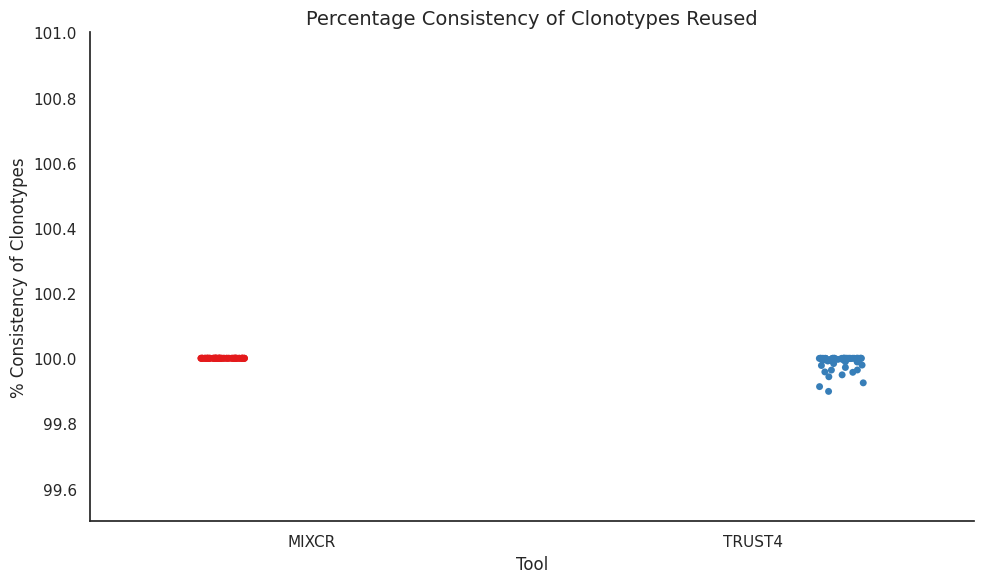

In [17]:
df_long = pd.melt(percent_consistency_clonotypes_reused, id_vars=['Sample'], value_vars=['%Clonotype_Reused_MIXCR', '%Clonotype_Reused_TRUST4'],
                  var_name='Tool', value_name='%Clonotype_Reused')

# Replace tool names for better visualization
df_long['Tool'] = df_long['Tool'].str.replace('%Clonotype_Reused_', '')

# Plot the stripplot with enhancements
plt.figure(figsize=(10, 6))

# Create the stripplot
plt.style.use(['ggplot', 'seaborn-v0_8-white'])
sns.set_style("white")
sns.set_context("notebook")
sns.stripplot(x='Tool', y='%Clonotype_Reused', data=df_long, jitter=True, palette='Set1', dodge=True)

# Set titles and labels
plt.title('Percentage Consistency of Clonotypes Reused', fontsize=14)
plt.xlabel('Tool', fontsize=12)
plt.ylabel('% Consistency of Clonotypes', fontsize=12)
plt.ylim(99.5, 100.5)
plt.tight_layout()
sns.despine()


/tmp/SLURM_23787975/ipykernel_31791/3900356355.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Tool', y='%Clonotype_Reused', data=df_long, jitter=0.2, palette='Set2', dodge=True)


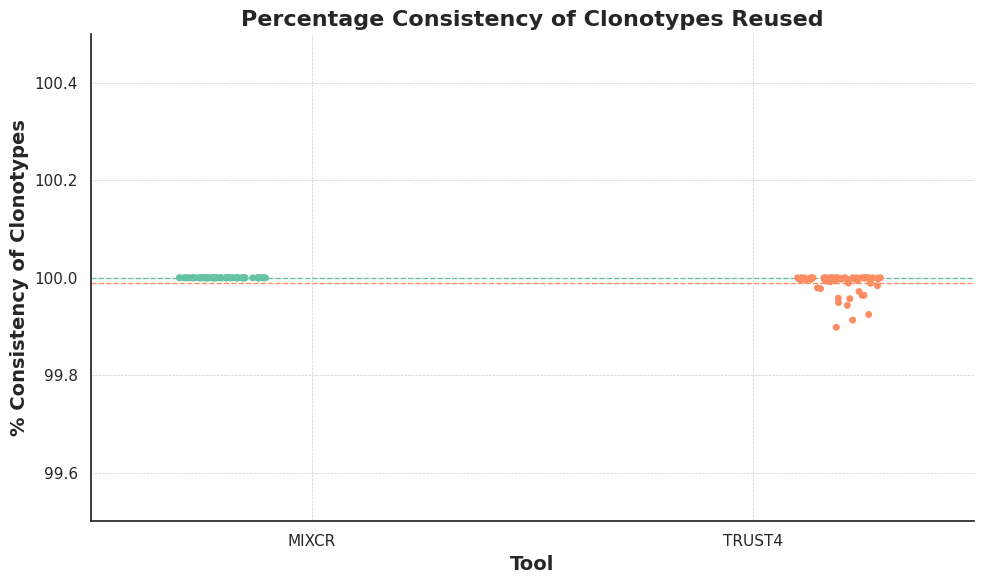

In [27]:
df_long = pd.melt(percent_consistency_clonotypes_reused, id_vars=['Sample'], value_vars=['%Clonotype_Reused_MIXCR', '%Clonotype_Reused_TRUST4'],
                  var_name='Tool', value_name='%Clonotype_Reused')

# Replace tool names for better visualization
df_long['Tool'] = df_long['Tool'].str.replace('%Clonotype_Reused_', '')

# Plot the stripplot with enhancements
plt.figure(figsize=(10, 6))

# Create the stripplot with increased jitter and improved palette
sns.stripplot(x='Tool', y='%Clonotype_Reused', data=df_long, jitter=0.2, palette='Set2', dodge=True)

# Add mean lines
mean_values = df_long.groupby('Tool')['%Clonotype_Reused'].mean()
for index, value in enumerate(mean_values):
    plt.axhline(y=value, color=sns.color_palette('Set2')[index], linestyle='--', linewidth=1)

# Set titles and labels
plt.title('Percentage Consistency of Clonotypes Reused', fontsize=16, fontweight='bold')
plt.xlabel('Tool', fontsize=14, fontweight='bold')
plt.ylabel('% Consistency of Clonotypes', fontsize=14, fontweight='bold')
plt.ylim(99.5, 100.5)

# Enhance layout and aesthetics
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
sns.despine()

# Save the plot as an image file for thesis inclusion
#plt.savefig('/mnt/data/percentage_consistency_clonotypes_reused_enhanced.png', dpi=300)
plt.show()

Loading master files

In [2]:
Trust_og=pd.read_csv('/scratch1/pjaiswal/ipynb_notebooks/master_files/TRUST4_Public_original_master_file.csv', low_memory=False)


# Venn Diagram

In [10]:
#Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
SRR5812619_original_TRUST4=pd.read_csv('/scratch1/pjaiswal/TRUST4_results/Public_data/original_fastq/clones_tsv/common_samples/SRR5812619_original_TRUST4.tsv', sep='\t', low_memory=False)
SRR5812619_shuffle_TRUST4=pd.read_csv('/scratch1/pjaiswal/TRUST4_results/Public_data/resort/clones_tsv/common_samples/SRR5812619_shuffle_TRUST4.tsv', sep='\t', low_memory=False)
SRR5812619_original_MIXCR=pd.read_csv('/scratch1/pjaiswal/MIXCR/Public_og/results/clones_tsv/merged_files/common_samples/SRR5812619_original_MIXCR.tsv', sep='\t', low_memory=False)
SRR5812619_shuffled_MIXCR=pd.read_csv('/scratch1/pjaiswal/MIXCR/Public_resort/merged_files/common_samples/SRR5812619_shuffled_MIXCR.tsv', sep='\t', low_memory=False)

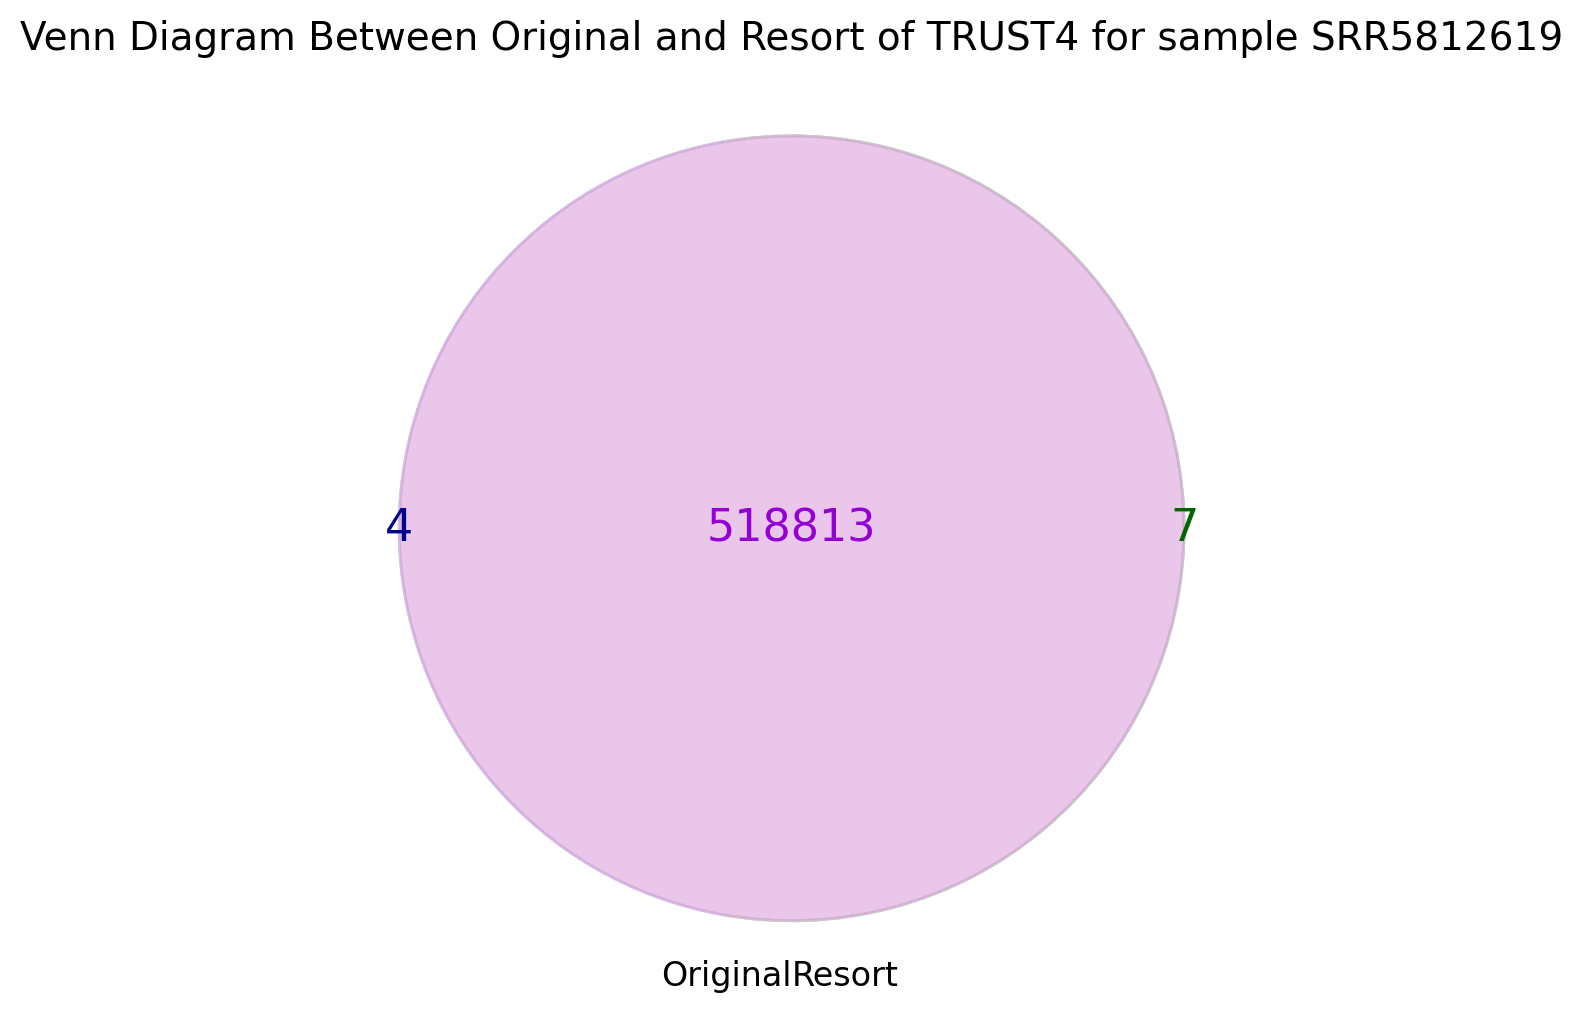

In [19]:
# Venn Diagram for observing the overlap between original and shuffled reads of sample HD_14 for TRUST4 tool
from matplotlib_venn import venn2

# Create sets from the 'nSeqCDR3' columns
set1 = set(SRR5812619_original_TRUST4['CDR3nt'])
set2 = set(SRR5812619_shuffle_TRUST4['CDR3nt'])

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([set1, set2], set_labels=('Original', 'Resort'))

# Customize colors
venn.get_label_by_id('10').set_color('darkblue')  # Only in Original
venn.get_label_by_id('01').set_color('darkgreen')  # Only in Resort
venn.get_label_by_id('11').set_color('darkviolet')  # In both

# Increase font size for numbers
for label_id in ('10', '01', '11'):
    venn.get_label_by_id(label_id).set_fontsize(16)

# Customize circle colors and alpha
venn.get_patch_by_id('10').set_color('lightblue')
venn.get_patch_by_id('10').set_alpha(0.6)
venn.get_patch_by_id('01').set_color('lightgreen')
venn.get_patch_by_id('01').set_alpha(0.6)
venn.get_patch_by_id('11').set_color('plum')
venn.get_patch_by_id('11').set_alpha(0.6)

# Add title
plt.title('Venn Diagram Between Original and Resort of TRUST4 for sample SRR5812619', fontsize= 14)
plt.savefig('/scratch1/pjaiswal/Venn_Public_TRUST4.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

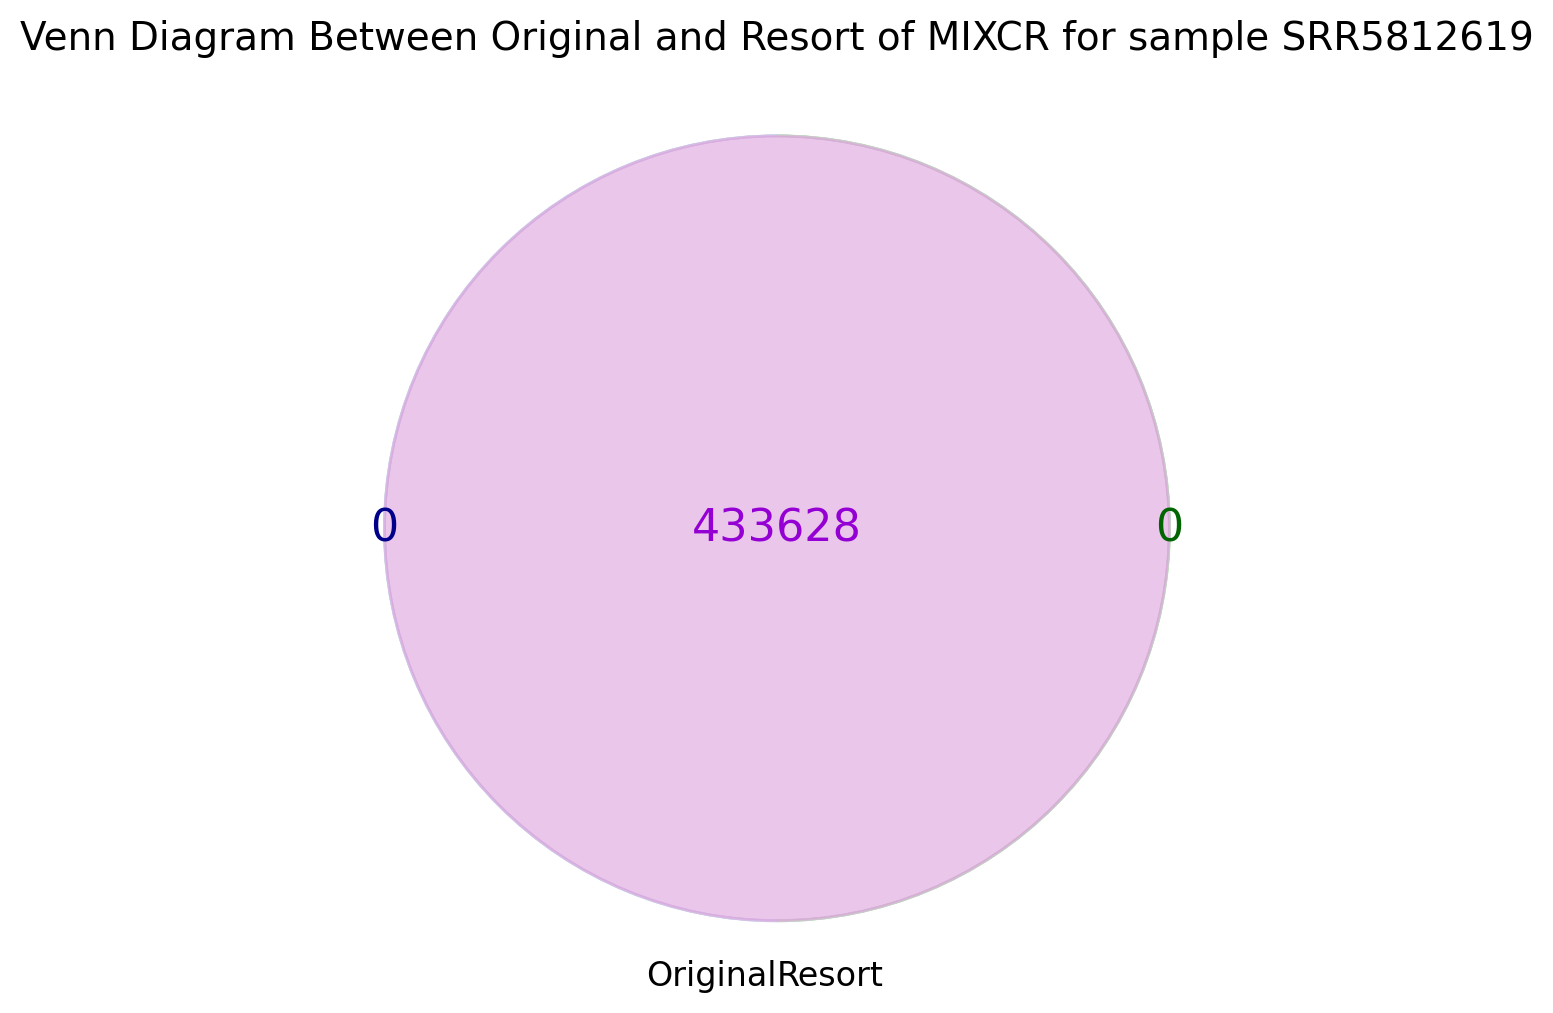

In [18]:
# Venn Diagram for observing the overlap between original and shuffled reads of sample HD_14 for MiXCR tool
set3 = set(SRR5812619_original_MIXCR['nSeqCDR3'])
set4 = set(SRR5812619_shuffled_MIXCR['nSeqCDR3'])

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([set3, set4], set_labels=('Original', 'Resort'))

# Customize colors
venn.get_label_by_id('10').set_color('darkblue')  # Only in Original
venn.get_label_by_id('01').set_color('darkgreen')  # Only in Resort
venn.get_label_by_id('11').set_color('darkviolet')  # In both

# Increase font size for numbers
for label_id in ('10', '01', '11'):
    venn.get_label_by_id(label_id).set_fontsize(16)

# Customize circle colors and alpha
venn.get_patch_by_id('10').set_color('lightblue')
venn.get_patch_by_id('10').set_alpha(0.6)
venn.get_patch_by_id('01').set_color('lightgreen')
venn.get_patch_by_id('01').set_alpha(0.6)
venn.get_patch_by_id('11').set_color('plum')
venn.get_patch_by_id('11').set_alpha(0.6)

# Add title
plt.title('Venn Diagram Between Original and Resort of MIXCR for sample SRR5812619', fontsize= 14)
plt.savefig('/scratch1/pjaiswal/Venn_Public_MIXCR.png', dpi=300, bbox_inches='tight')
# Show plot
# Show plot
plt.show()

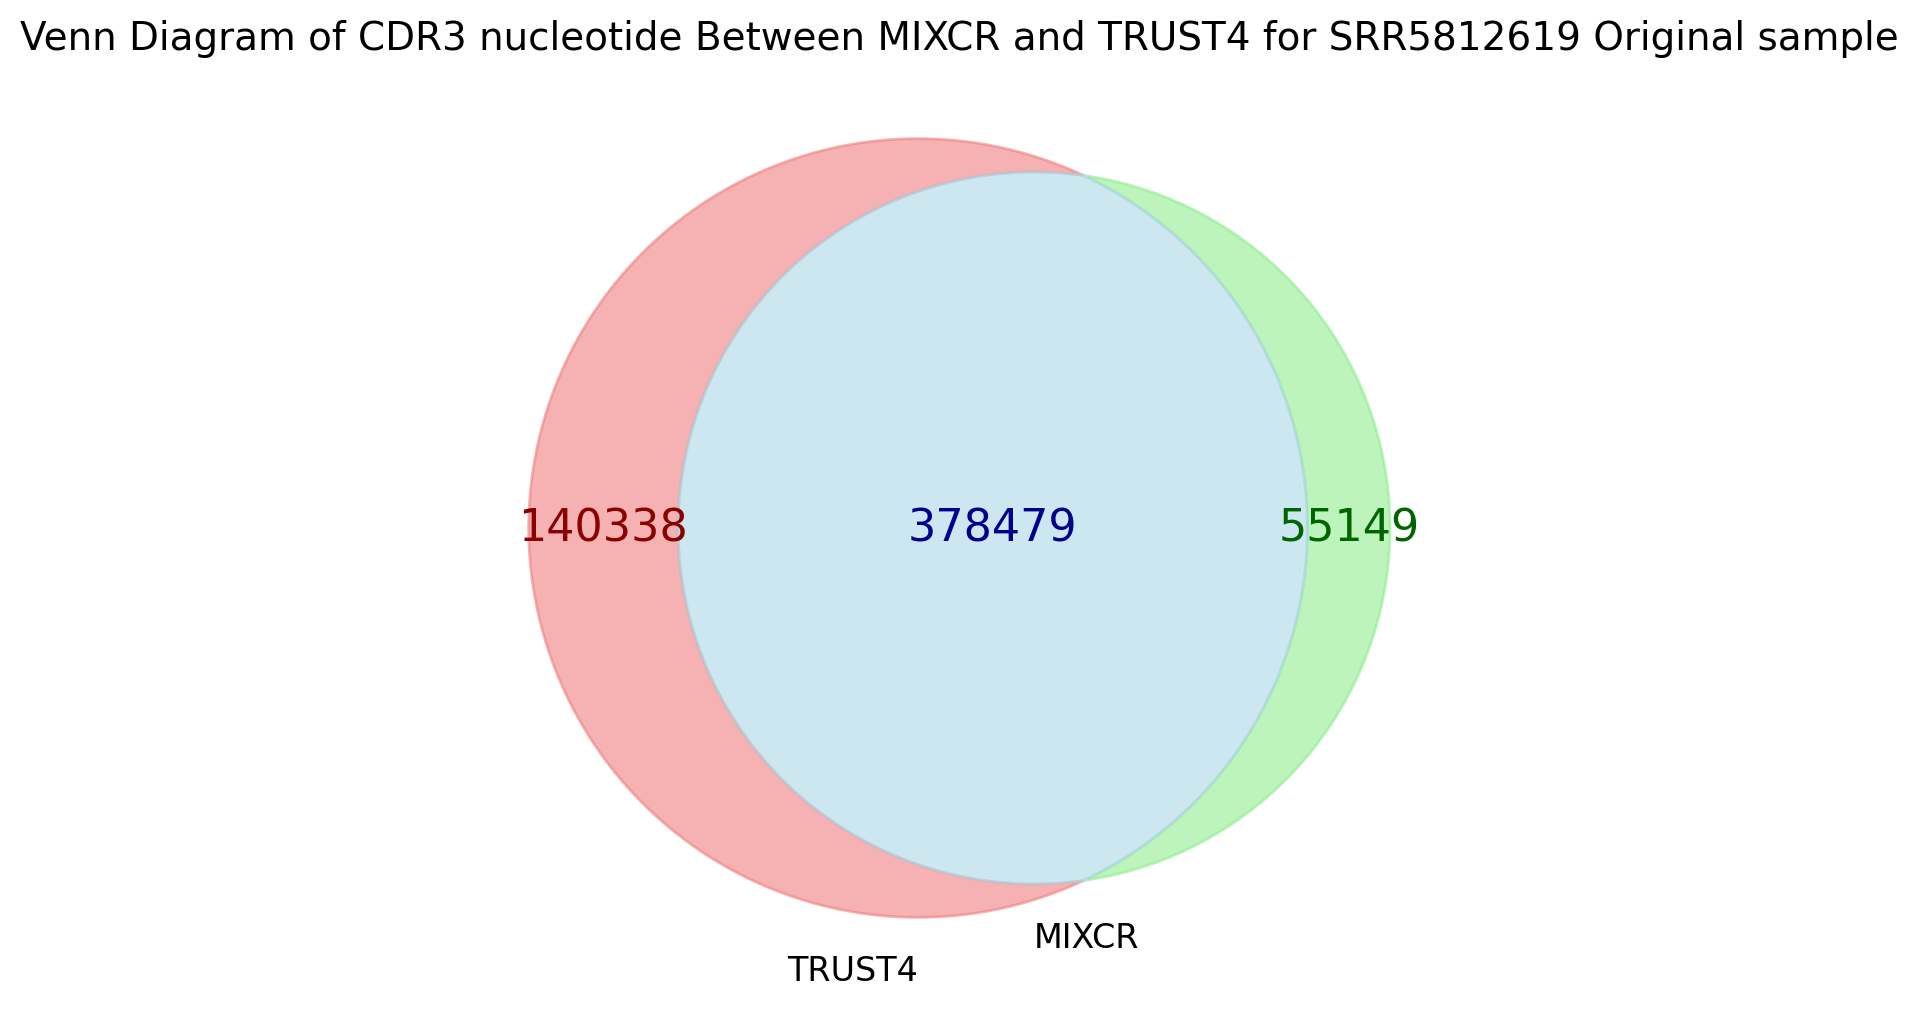

In [20]:
# Create the Venn diagram for comparing results for original sample HD_14 between the tools MIXCR and TRUST4 
plt.figure(figsize=(8, 6))
venn = venn2([set1, set3], set_labels=('TRUST4', 'MIXCR'))

# Customize colors for labels
venn.get_label_by_id('10').set_color('darkred')    # Only in TRUST4
venn.get_label_by_id('01').set_color('darkgreen')   # Only in MIXCR
venn.get_label_by_id('11').set_color('darkblue') # In both

# Increase font size for numbers
for label_id in ('10', '01', '11'):
    venn.get_label_by_id(label_id).set_fontsize(16)

# Customize colors for the circles and their transparency
venn.get_patch_by_id('10').set_color('lightcoral')
venn.get_patch_by_id('10').set_alpha(0.6)
venn.get_patch_by_id('01').set_color('lightgreen')
venn.get_patch_by_id('01').set_alpha(0.6)
venn.get_patch_by_id('11').set_color('lightblue')
venn.get_patch_by_id('11').set_alpha(0.6)

# Add title
plt.title('Venn Diagram of CDR3 nucleotide Between MIXCR and TRUST4 for SRR5812619 Original sample', fontsize=14)
plt.savefig('/scratch1/pjaiswal/Venn_Public_Original_Between_tools.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

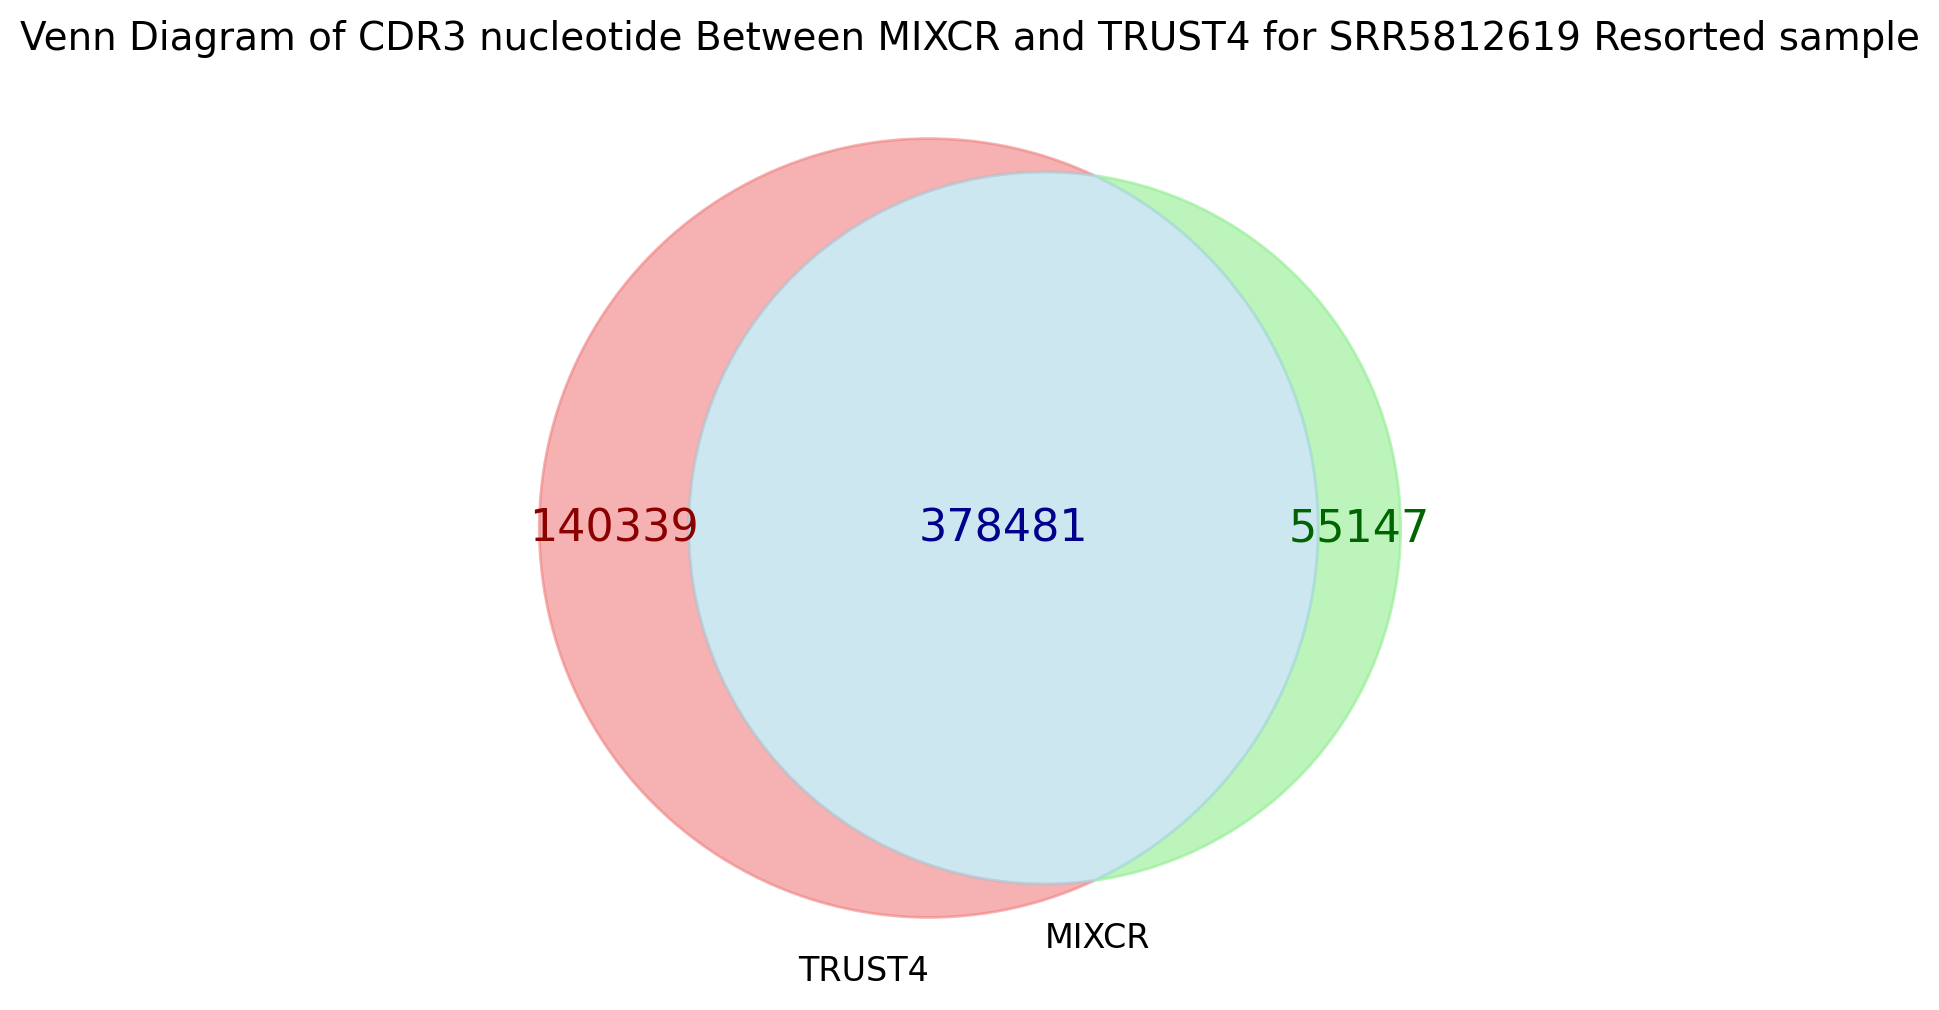

In [21]:
# Create the Venn diagram for comparing results for shuffled sample HD_14 between the tools MIXCR and TRUST4 
plt.figure(figsize=(8, 6))
venn = venn2([set2, set4], set_labels=('TRUST4', 'MIXCR'))

# Customize colors for labels
venn.get_label_by_id('10').set_color('darkred')    # Only in TRUST4
venn.get_label_by_id('01').set_color('darkgreen')   # Only in MIXCR
venn.get_label_by_id('11').set_color('darkblue') # In both

# Increase font size for numbers
for label_id in ('10', '01', '11'):
    venn.get_label_by_id(label_id).set_fontsize(16)

# Customize colors for the circles and their transparency
venn.get_patch_by_id('10').set_color('lightcoral')
venn.get_patch_by_id('10').set_alpha(0.6)
venn.get_patch_by_id('01').set_color('lightgreen')
venn.get_patch_by_id('01').set_alpha(0.6)
venn.get_patch_by_id('11').set_color('lightblue')
venn.get_patch_by_id('11').set_alpha(0.6)


# Add title
plt.title('Venn Diagram of CDR3 nucleotide Between MIXCR and TRUST4 for SRR5812619 Resorted sample', fontsize=14)
plt.savefig('/scratch1/pjaiswal/Venn_Public_Resort_Between_tools.png', dpi=300, bbox_inches='tight' )
# Show plot
plt.show()

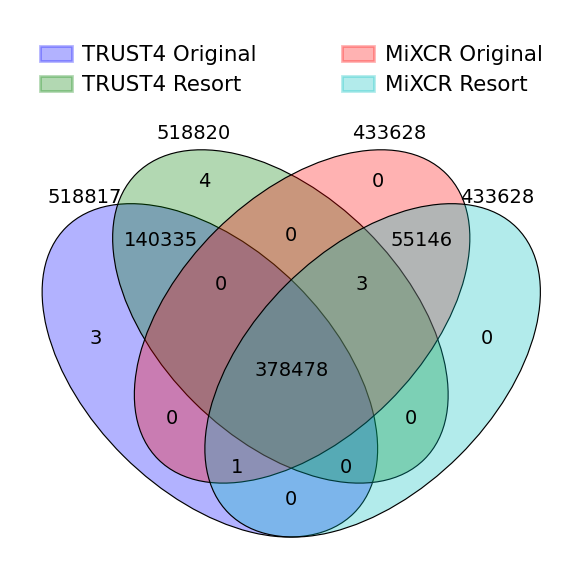

In [23]:
from venny4py.venny4py import *
#Venn Diagram for both resorted and original files analyzed by MIXCR and TRUST4
# Create sets from the 'CDR3nt' and 'nSeqCDR3' columns
sets = {
    'TRUST4 Original': set(SRR5812619_original_TRUST4['CDR3nt']),    # TRUST4 Original
    'TRUST4 Resort': set(SRR5812619_shuffle_TRUST4['CDR3nt']),    # TRUST4 Resort
    'MiXCR Original': set(SRR5812619_original_MIXCR['nSeqCDR3']),    # MiXCR Original
    'MiXCR Resort': set(SRR5812619_shuffled_MIXCR['nSeqCDR3'])  # MiXCR Resort
}

# Generate the Venn diagram
venny4py(sets=sets)


plt.savefig('/scratch1/pjaiswal/Venn_Public_all.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

# Scatter Plot

In [3]:
Trust_shuffle=pd.read_csv('/scratch1/pjaiswal/ipynb_notebooks/master_files/TRUST4_Public_shuffle_master_file.csv', low_memory=False)

In [17]:
Trust_og.head()

,Unnamed: 0,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,Type
0,0,HD_30_S14_L001_original_MIXCR,0.0274990246433412,6837.0,CAGFSGGYQKVTF,TGTGCGGGCTTTTCTGGGGGTTACCAGAAAGTTACCTTT,TRAV5*00(3322.5),.,TRAJ13*00(587.4),Original_Mixcr
1,1,HD_30_S14_L001_original_MIXCR,0.0085791165078611,2133.0,CAVDSDNDMRF,TGTGCCGTGGACTCCGACAATGACATGCGCTTT,TRAV39*00(3400.2),.,TRAJ43*00(478.3),Original_Mixcr
2,2,HD_30_S14_L001_original_MIXCR,0.0043921215314507,1092.0,CATPYNFNKFYF,TGTGCTACGCCCTACAACTTCAACAAATTTTACTTT,TRAV17*00(3494),.,TRAJ21*00(547.9),Original_Mixcr
3,3,HD_30_S14_L001_original_MIXCR,0.004074376475604,1013.0,CAFGKGGSNYKLTF,TGTGCCTTCGGTAAGGGAGGTAGCAACTATAAACTGACATTT,TRAV24*00(3479.8),.,TRAJ53*00(576.9),Original_Mixcr
4,4,HD_30_S14_L001_original_MIXCR,0.003941647528225,980.0,CLVGDRGNFNKFYF,TGCCTCGTGGGTGACCGGGGCAACTTCAACAAATTTTACTTT,TRAV4*00(3363.9),.,TRAJ21*00(527.8),Original_Mixcr


In [4]:
Trust_og['#count'] = pd.to_numeric(Trust_og['#count'], errors='coerce')
Trust_shuffle['#count'] = pd.to_numeric(Trust_shuffle['#count'], errors='coerce')

In [ ]:
#sns.stripplot(x='sample', y='#count', data=Mixcr_og, jitter=True, palette='Set1', dodge=True, hue='cdr3nt', legend=False)

In [ ]:
# Venn Diagram for observing the overlap between original and shuffled reads of sample HD_14 for TRUST4 tool
from matplotlib_venn import venn2
# Create sets from the 'nSeqCDR3' columns
set1 = set(HD_14_S2_L001_original_report['CDR3nt'])
set2 = set(HD_14_S2_L001_shuffle4_report['CDR3nt'])

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([set1, set2], set_labels=('Original', 'Resort'))

# Customize colors
venn.get_label_by_id('10').set_color('blue')  # Only in Original
venn.get_label_by_id('01').set_color('green')  # Only in Resort
venn.get_label_by_id('11').set_color('purple')  # In both

# Customize circle colors and alpha
venn.get_patch_by_id('10').set_color('blue')
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_color('green')
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_color('purple')
venn.get_patch_by_id('11').set_alpha(0.5)

# Add title
plt.title('Venn Diagram of CDR3 nucleotide Between Original and Resort of TRUST4')

# Show plot
plt.show()

In [ ]:
# Venn Diagram for observing the overlap between original and shuffled reads of sample HD_14 for MiXCR tool
set3 = set(HD_14_S2_L001_clones_merged['nSeqCDR3'])
set4 = set(HD_14_S2_L001_shuffled_v7_clones_merged['nSeqCDR3'])

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([set3, set4], set_labels=('Original', 'Resort'))

# Customize colors
venn.get_label_by_id('10').set_color('blue')  # Only in Original
venn.get_label_by_id('01').set_color('green')  # Only in Resort
venn.get_label_by_id('11').set_color('purple')  # In both

# Customize circle colors and alpha
venn.get_patch_by_id('10').set_color('blue')
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_color('green')
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_color('purple')
venn.get_patch_by_id('11').set_alpha(0.5)

# Add title
plt.title('Venn Diagram of nSeqCDR3 Between Original and Resort of MIXCR')

# Show plot

In [ ]:
# Create the Venn diagram for comparing results for original sample HD_14 between the tools MIXCR and TRUST4 
plt.figure(figsize=(8, 6))
venn = venn2([set1, set3], set_labels=('TRUST4', 'MIXCR'))

# Customize colors for labels
venn.get_label_by_id('10').set_color('red')    # Only in TRUST4
venn.get_label_by_id('01').set_color('green')   # Only in MIXCR
venn.get_label_by_id('11').set_color('blue') # In both

# Customize colors for the circles and their transparency
venn.get_patch_by_id('10').set_color('red')
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_color('green')
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_color('blue')
venn.get_patch_by_id('11').set_alpha(0.5)

# Add title
plt.title('Venn Diagram of CDR3 nucleotide Between MIXCR and TRUST4 for Original sample')

# Show plot
plt.show()

In [ ]:
# Create the Venn diagram for comparing results for shuffled sample HD_14 between the tools MIXCR and TRUST4 
plt.figure(figsize=(8, 6))
venn = venn2([set2, set4], set_labels=('TRUST4', 'MIXCR'))

# Customize colors for labels
venn.get_label_by_id('10').set_color('red')    # Only in TRUST4
venn.get_label_by_id('01').set_color('green')   # Only in MIXCR
venn.get_label_by_id('11').set_color('blue') # In both

# Customize colors for the circles and their transparency
venn.get_patch_by_id('10').set_color('red')
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_color('green')
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_color('blue')
venn.get_patch_by_id('11').set_alpha(0.5)

# Add title
plt.title('Venn Diagram of CDR3 nucleotide Between MIXCR and TRUST4 for Resorted sample')

# Show plot
plt.show()

In [ ]:
from venny4py.venny4py import *

In [ ]:
#Venn Diagram for both resorted and original files analyzed by MIXCR and TRUST4
# Create sets from the 'CDR3nt' and 'nSeqCDR3' columns
sets = {
    'TRUST4 Original': set(HD_14_S2_L001_original_report['CDR3nt']),    # TRUST4 Original
    'TRUST4 Resort': set(HD_14_S2_L001_shuffle4_report['CDR3nt']),    # TRUST4 Resort
    'MiXCR Original': set(HD_14_S2_L001_clones_merged['nSeqCDR3']),    # MiXCR Original
    'MiXCR Resort': set(HD_14_S2_L001_shuffled_v7_clones_merged['nSeqCDR3'])  # MiXCR Resort
}

# Generate the Venn diagram
venny4py(sets=sets)




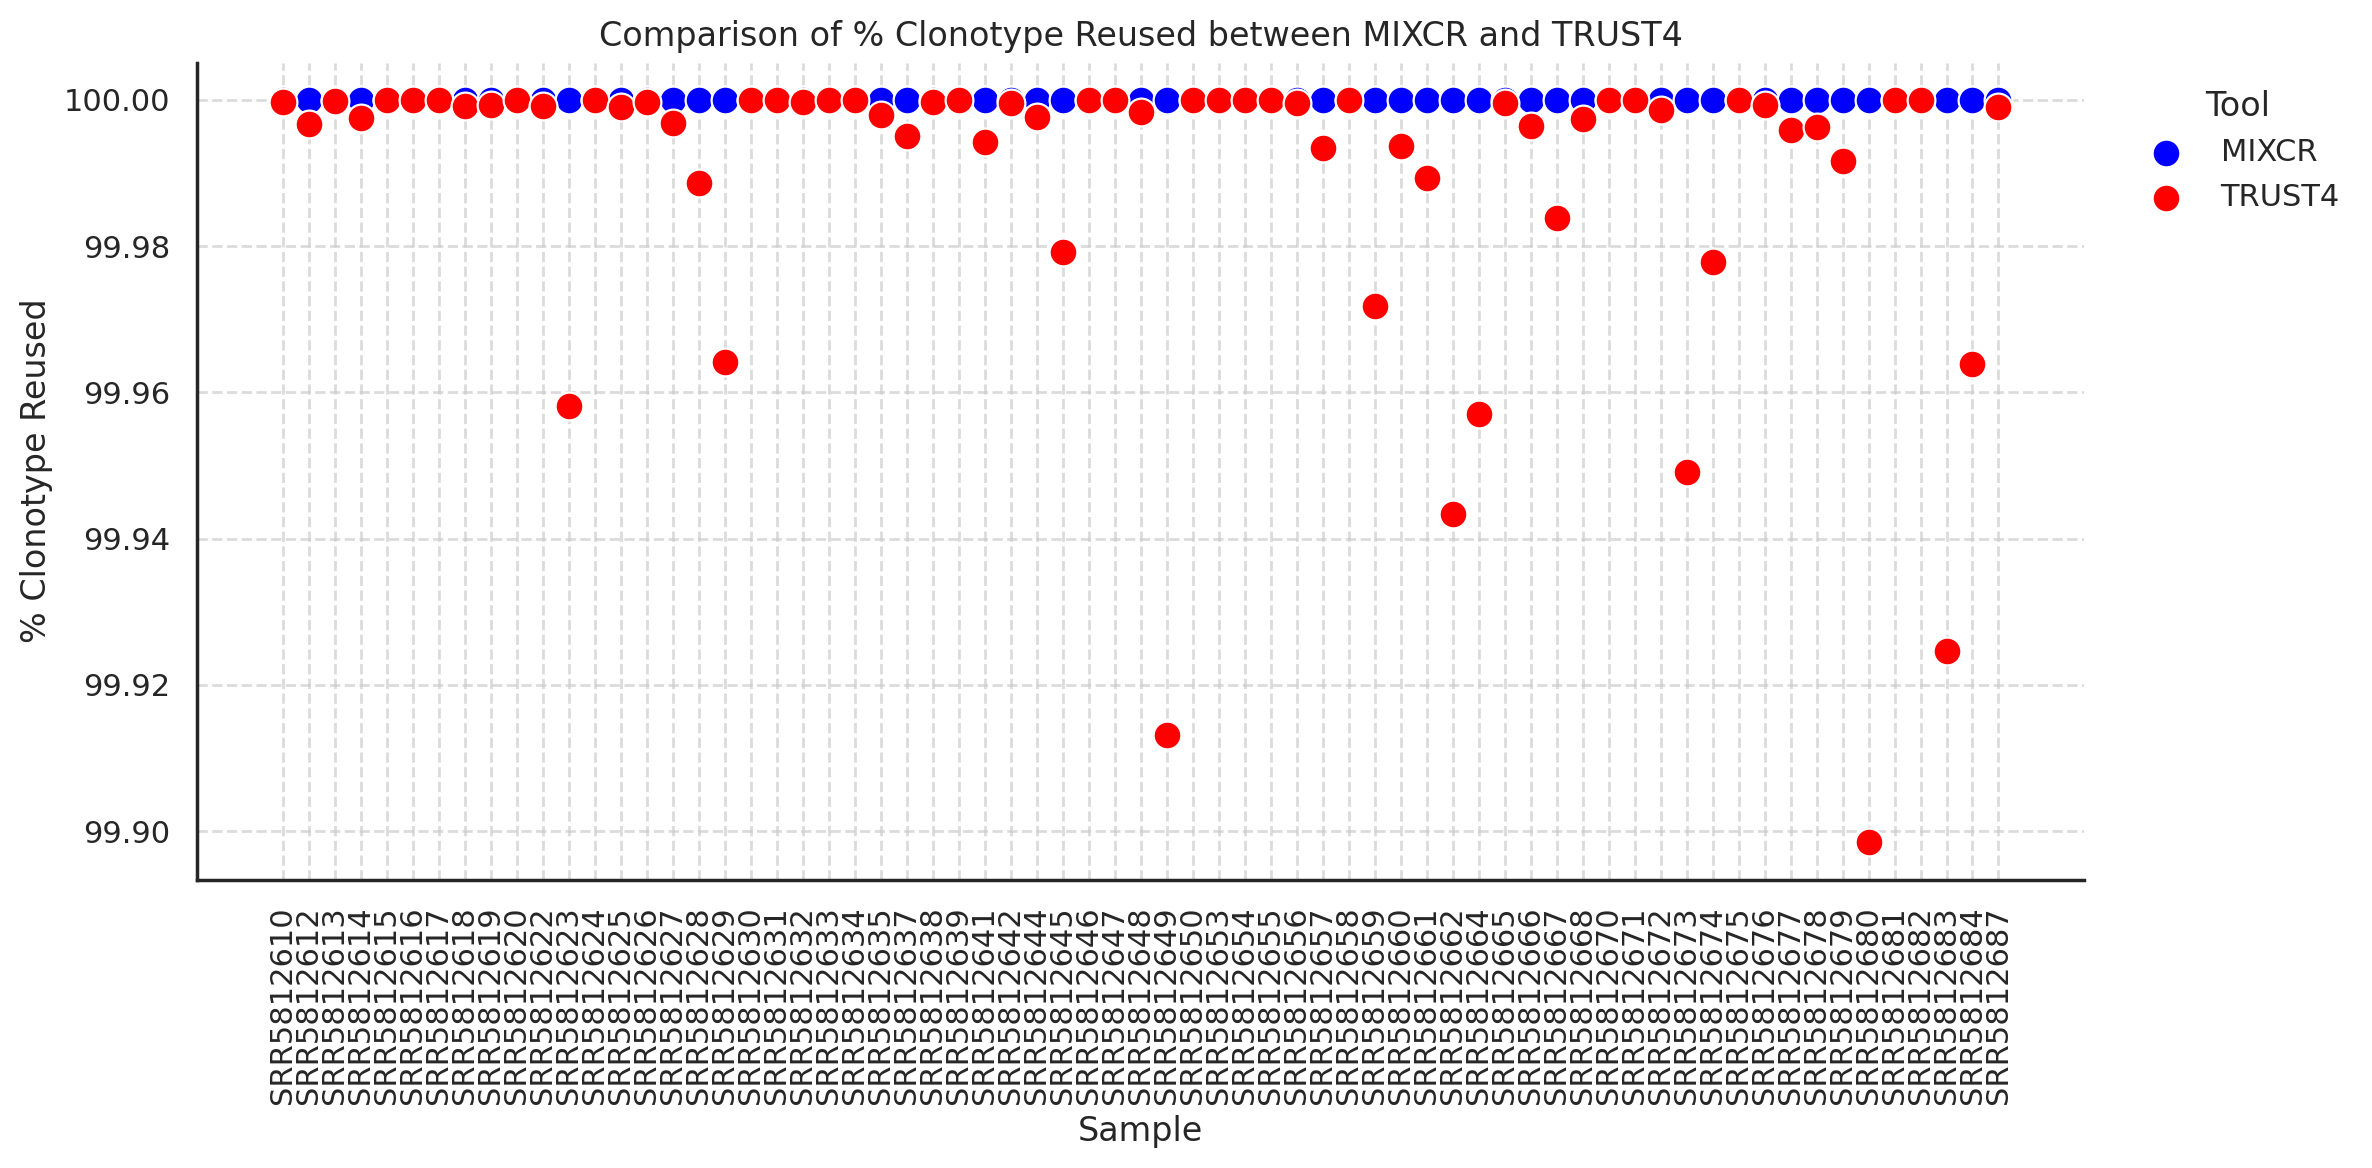

In [50]:
merged_df = pd.merge(results_df_MIXCR, results_df_TRUST4, on='Sample', how='inner')
merged_df.rename(columns={'%Clonotype_Reused_MIXCR': 'MIXCR', '%Clonotype_Reused_TRUST4': 'TRUST4'}, inplace=True)
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the data for MIXCR
sns.scatterplot(data=merged_df, x="Sample", y="MIXCR", label="MIXCR", color="blue", s=100)

# Plot the data for TRUST4
sns.scatterplot(data=merged_df, x="Sample", y="TRUST4", label="TRUST4", color="red", s=100)

# Rotate the x-axis labels for long sample names
plt.xticks(rotation=90)

# Improve plot aesthetics
plt.xlabel('Sample')
plt.ylabel('% Clonotype Reused')
plt.title('Comparison of % Clonotype Reused between MIXCR and TRUST4')
plt.legend(title='Tool', loc='upper right', bbox_to_anchor=(1.15, 1))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
# Show the plot
plt.tight_layout()
plt.savefig('/scratch1/pjaiswal/ipynb_notebooks/Figures/Comparison_Clonotype_Public.pdf', dpi=300)
plt.show()


# For Aminoacid CDR3sequence performing similar analysis

In [27]:
list (RS_2_SW.columns)

['cloneId',
 'readCount',
 'readFraction',
 'uniqueMoleculeCount',
 'uniqueMoleculeFraction',
 'targetSequences',
 'targetQualities',
 'allVHitsWithScore',
 'allDHitsWithScore',
 'allJHitsWithScore',
 'allCHitsWithScore',
 'allVAlignments',
 'allDAlignments',
 'allJAlignments',
 'allCAlignments',
 'nSeqFR1',
 'minQualFR1',
 'nSeqCDR1',
 'minQualCDR1',
 'nSeqFR2',
 'minQualFR2',
 'nSeqCDR2',
 'minQualCDR2',
 'nSeqFR3',
 'minQualFR3',
 'nSeqCDR3',
 'minQualCDR3',
 'nSeqFR4',
 'minQualFR4',
 'aaSeqFR1',
 'aaSeqCDR1',
 'aaSeqFR2',
 'aaSeqCDR2',
 'aaSeqFR3',
 'aaSeqCDR3',
 'aaSeqFR4',
 'refPoints',
 'isotype']

In [28]:
# Function to perform analysis on a pair of original and shuffled DataFrames
def analyze_pair(original_df_name, shuffled_df_name, column_name='aaSeqCDR3'):
    original_df = globals()[original_df_name]
    shuffled_df = globals()[shuffled_df_name]
    
    unique_values_file1_aa = original_df[column_name]
    unique_values_file2_aa = shuffled_df[column_name]
    
    # Find unique values between the two columns
    unique_values_between_files_aa = set(unique_values_file1_aa) ^ set(unique_values_file2_aa)
    
    # Find the shared CDR3 sequences
    shared_seq_aa = set(unique_values_file1_aa) & set(unique_values_file2_aa)
    
    # %clonotypes reused based on shared sequences
    percent_clonotype_amino_acid_reused = len(shared_seq_aa) / len(set(unique_values_file1_aa)) * 100
    
    print(f"Analysis for {original_df_name} and {shuffled_df_name}:")
    print("Number of clonotypes in the original file: ", len(set(unique_values_file1_aa)))
    print("Number of clonotypes in the shuffled file: ", len(set(unique_values_file2_aa)))
    print("Number of shared clonotypes: ", len(shared_seq_aa))
    print("%clonotype reused:", percent_clonotype_amino_acid_reused)
    print("Number of unique amino acid clonotypes:", len(unique_values_between_files_aa))
    print("\n")
    
    return {
        'Sample': original_df_name.replace('_L001_clones_merged', ''),
        '%Clonotype_AA_Reused_MIXCR': percent_clonotype_amino_acid_reused
    }

# Mapping of original and shuffled DataFrames
pairs = {
    'RS_2_SW': 'RS_2_SW_shuffled_v7_clones_merged',
    'RS_3_JB': 'RS_3_JB_shuffled_v7_clones_merged',
    'RS_4_LY': 'RS_4_LY_shuffled_v7_clones_merged',
    'RS_6_LK': 'RS_6_LK_shuffled_v7_clones_merged',
    'RS_7_Chr': 'RS_7_Chr_shuffled_v7_clones_merged',
    'RS_8_Jor': 'RS_8_Jor_shuffled_v7_clones_merged',
    'RS_9_Jar': 'RS_9_Jar_shuffled_v7_clones_merged',
    'RS_10_SS': 'RS_10_SS_shuffled_v7_clones_merged',
    'RS_11_YZ': 'RS_11_YZ_shuffled_v7_clones_merged',
    'RS_12_JS': 'RS_12_JS_shuffled_v7_clones_merged',
    'HD_10_S1_L001_clones_merged': 'HD_10_S1_L001_shuffled_v7_clones_merged',
    'HD_14_S2_L001_clones_merged': 'HD_14_S2_L001_shuffled_v7_clones_merged',
    'HD_20_S4_L001_clones_merged': 'HD_20_S4_L001_shuffled_v7_clones_merged',
    'HD_21_S5_L001_clones_merged': 'HD_21_S5_L001_shuffled_v7_clones_merged',
    'HD_22_S6_L001_clones_merged': 'HD_22_S6_L001_shuffled_v7_clones_merged',
    'HD_23_S7_L001_clones_merged': 'HD_23_S7_L001_shuffled_v7_clones_merged',
    'HD_24_S8_L001_clones_merged': 'HD_24_S8_L001_shuffled_v7_clones_merged',
    'HD_25_S9_L001_clones_merged': 'HD_25_S9_L001_shuffled_v7_clones_merged',
    'HD_26_S10_L001_clones_merged': 'HD_26_S10_L001_shuffled_v7_clones_merged',
    'HD_27_S11_L001_clones_merged': 'HD_27_S11_L001_shuffled_v7_clones_merged',
    'HD_28_S12_L001_clones_merged': 'HD_28_S12_L001_shuffled_v7_clones_merged',
    'HD_29_S13_L001_clones_merged': 'HD_29_S13_L001_shuffled_v7_clones_merged',
    'HD_30_S14_L001_clones_merged': 'HD_30_S14_L001_shuffled_v7_clones_merged',
    'HD_31_S15_L001_clones_merged': 'HD_31_S15_L001_shuffled_v7_clones_merged',
    'HD_32_S16_L001_clones_merged': 'HD_32_S16_L001_shuffled_v7_clones_merged',
    'HD_33_S17_L001_clones_merged': 'HD_33_S17_L001_shuffled_v7_clones_merged',
    'HD_34_S18_L001_clones_merged': 'HD_34_S18_L001_shuffled_v7_clones_merged',
    'HD_35_S19_L001_clones_merged': 'HD_35_S19_L001_shuffled_v7_clones_merged',
    'HD_36_S20_L001_clones_merged': 'HD_36_S20_L001_shuffled_v7_clones_merged',
    'HD_LK_S3_L001_clones_merged': 'HD_LK_S3_L001_shuffled_v7_clones_merged'
}

# Perform analysis for each pair and collect results
results = []
for original_name, shuffled_name in pairs.items():
    result = analyze_pair(original_name, shuffled_name)
    results.append(result)

# Create a DataFrame from the results
results_df_AA_MIXCR = pd.DataFrame(results)

# Display the DataFrame
print(results_df_AA_MIXCR)

Analysis for RS_2_SW and RS_2_SW_shuffled_v7_clones_merged:
Number of clonotypes in the original file:  3628
Number of clonotypes in the shuffled file:  3621
Number of shared clonotypes:  3621
%clonotype reused: 99.80705622932746
Number of unique amino acid clonotypes: 7


Analysis for RS_3_JB and RS_3_JB_shuffled_v7_clones_merged:
Number of clonotypes in the original file:  8954
Number of clonotypes in the shuffled file:  8927
Number of shared clonotypes:  8927
%clonotype reused: 99.69845878936788
Number of unique amino acid clonotypes: 27


Analysis for RS_4_LY and RS_4_LY_shuffled_v7_clones_merged:
Number of clonotypes in the original file:  27780
Number of clonotypes in the shuffled file:  27736
Number of shared clonotypes:  27733
%clonotype reused: 99.83081353491721
Number of unique amino acid clonotypes: 50


Analysis for RS_6_LK and RS_6_LK_shuffled_v7_clones_merged:
Number of clonotypes in the original file:  21730
Number of clonotypes in the shuffled file:  21633
Number of sha

In [29]:
list(RS_2_SW_original_report.columns)

['#count',
 'frequency',
 'CDR3nt',
 'CDR3aa',
 'V',
 'D',
 'J',
 'C',
 'cid',
 'cid_full_length']

In [35]:
# Function to perform analysis on a pair of original and shuffled DataFrames
def analyze_pair(original_df_name, shuffled_df_name, column_name='CDR3aa'):
    original_df = globals()[original_df_name]
    shuffled_df = globals()[shuffled_df_name]
    
    unique_values_file1_aa = original_df[column_name]
    unique_values_file2_aa = shuffled_df[column_name]
    
    # Find unique values between the two columns
    unique_values_between_files_aa = set(unique_values_file1_aa) ^ set(unique_values_file2_aa)
    
    # Find the shared CDR3 sequences
    shared_seq_aa = set(unique_values_file1_aa) & set(unique_values_file2_aa)
    
    # %clonotypes reused based on shared sequences
    percent_clonotype_amino_acid_reused = len(shared_seq_aa) / len(set(unique_values_file1_aa)) * 100
    
    print(f"Analysis for {original_df_name} and {shuffled_df_name}:")
    print("Number of amino acid sequences of clonotypes in the original file: ", len(set(unique_values_file1_aa)))
    print("Number of amino acid sequences of clonotypes in the shuffled file: ", len(set(unique_values_file2_aa)))
    print("Number of shared clonotypes amino acid sequences: ", len(shared_seq_aa))
    print("%clonotype reused:", percent_clonotype_amino_acid_reused)
    print("Number of unique amino acid clonotypes:", len(unique_values_between_files_aa))
    print("\n")
    
    sample_name = original_df_name.replace('_L001_original_report', '').replace('_original_report', '')
    
    return {
        'Sample': sample_name,
        '%Clonotype_AA_Reused': percent_clonotype_amino_acid_reused
    }

# Assuming pairs is a dictionary where keys are original DataFrame names and values are corresponding shuffled DataFrame names
pairs = {
    'RS_2_SW_original_report': 'RS_2_SW_shuffle4_report',
    'RS_3_JB_original_report': 'RS_3_JB_shuffle4_report',
    'RS_4_LY_original_report': 'RS_4_LY_shuffle4_report',
    'RS_6_LK_original_report': 'RS_6_LK_shuffle4_report',
    'RS_7_Chr_original_report': 'RS_7_Chr_shuffle4_report',
    'RS_8_Jor_original_report': 'RS_8_Jor_shuffle4_report',
    'RS_9_Jar_original_report': 'RS_9_Jar_shuffle4_report',
    'RS_10_SS_original_report': 'RS_10_SS_shuffle4_report',
    'RS_11_YZ_original_report': 'RS_11_YZ_shuffle4_report',
    'RS_12_JS_original_report': 'RS_12_JS_shuffle4_report',
    'HD_10_S1_L001_original_report': 'HD_10_S1_L001_shuffle4_report',
    'HD_14_S2_L001_original_report': 'HD_14_S2_L001_shuffle4_report',
    'HD_20_S4_L001_original_report': 'HD_20_S4_L001_shuffle4_report',
    'HD_21_S5_L001_original_report': 'HD_21_S5_L001_shuffle4_report',
    'HD_22_S6_L001_original_report': 'HD_22_S6_L001_shuffle4_report',
    'HD_23_S7_L001_original_report': 'HD_23_S7_L001_shuffle4_report',
    'HD_24_S8_L001_original_report': 'HD_24_S8_L001_shuffle4_report',
    'HD_25_S9_L001_original_report': 'HD_25_S9_L001_shuffle4_report',
    'HD_26_S10_L001_original_report': 'HD_26_S10_L001_shuffle4_report',
    'HD_27_S11_L001_original_report': 'HD_27_S11_L001_shuffle4_report',
    'HD_28_S12_L001_original_report': 'HD_28_S12_L001_shuffle4_report',
    'HD_29_S13_L001_original_report': 'HD_29_S13_L001_shuffle4_report',
    'HD_30_S14_L001_original_report': 'HD_30_S14_L001_shuffle4_report',
    'HD_31_S15_L001_original_report': 'HD_31_S15_L001_shuffle4_report',
    'HD_32_S16_L001_original_report': 'HD_32_S16_L001_shuffle4_report',
    'HD_33_S17_L001_original_report': 'HD_33_S17_L001_shuffle4_report',
    'HD_34_S18_L001_original_report': 'HD_34_S18_L001_shuffle4_report',
    'HD_35_S19_L001_original_report': 'HD_35_S19_L001_shuffle4_report',
    'HD_36_S20_L001_original_report': 'HD_36_S20_L001_shuffle4_report',
    'HD_LK_S3_L001_original_report': 'HD_LK_S3_L001_shuffle4_report'
}

# Perform analysis for each pair and collect results
results = []
for original_name, shuffled_name in pairs.items():
    result = analyze_pair(original_name, shuffled_name)
    results.append(result)

# Create a DataFrame from the results
results_aa_df_TRUST4 = pd.DataFrame(results)

# Display the DataFrame
print(results_aa_df_TRUST4)

Analysis for RS_2_SW_original_report and RS_2_SW_shuffle4_report:
Number of amino acid sequences of clonotypes in the original file:  11878
Number of amino acid sequences of clonotypes in the shuffled file:  11878
Number of shared clonotypes amino acid sequences:  11878
%clonotype reused: 100.0
Number of unique amino acid clonotypes: 0


Analysis for RS_3_JB_original_report and RS_3_JB_shuffle4_report:
Number of amino acid sequences of clonotypes in the original file:  37173
Number of amino acid sequences of clonotypes in the shuffled file:  37250
Number of shared clonotypes amino acid sequences:  37053
%clonotype reused: 99.67718505366798
Number of unique amino acid clonotypes: 317


Analysis for RS_4_LY_original_report and RS_4_LY_shuffle4_report:
Number of amino acid sequences of clonotypes in the original file:  77827
Number of amino acid sequences of clonotypes in the shuffled file:  77833
Number of shared clonotypes amino acid sequences:  77520
%clonotype reused: 99.6055353540545

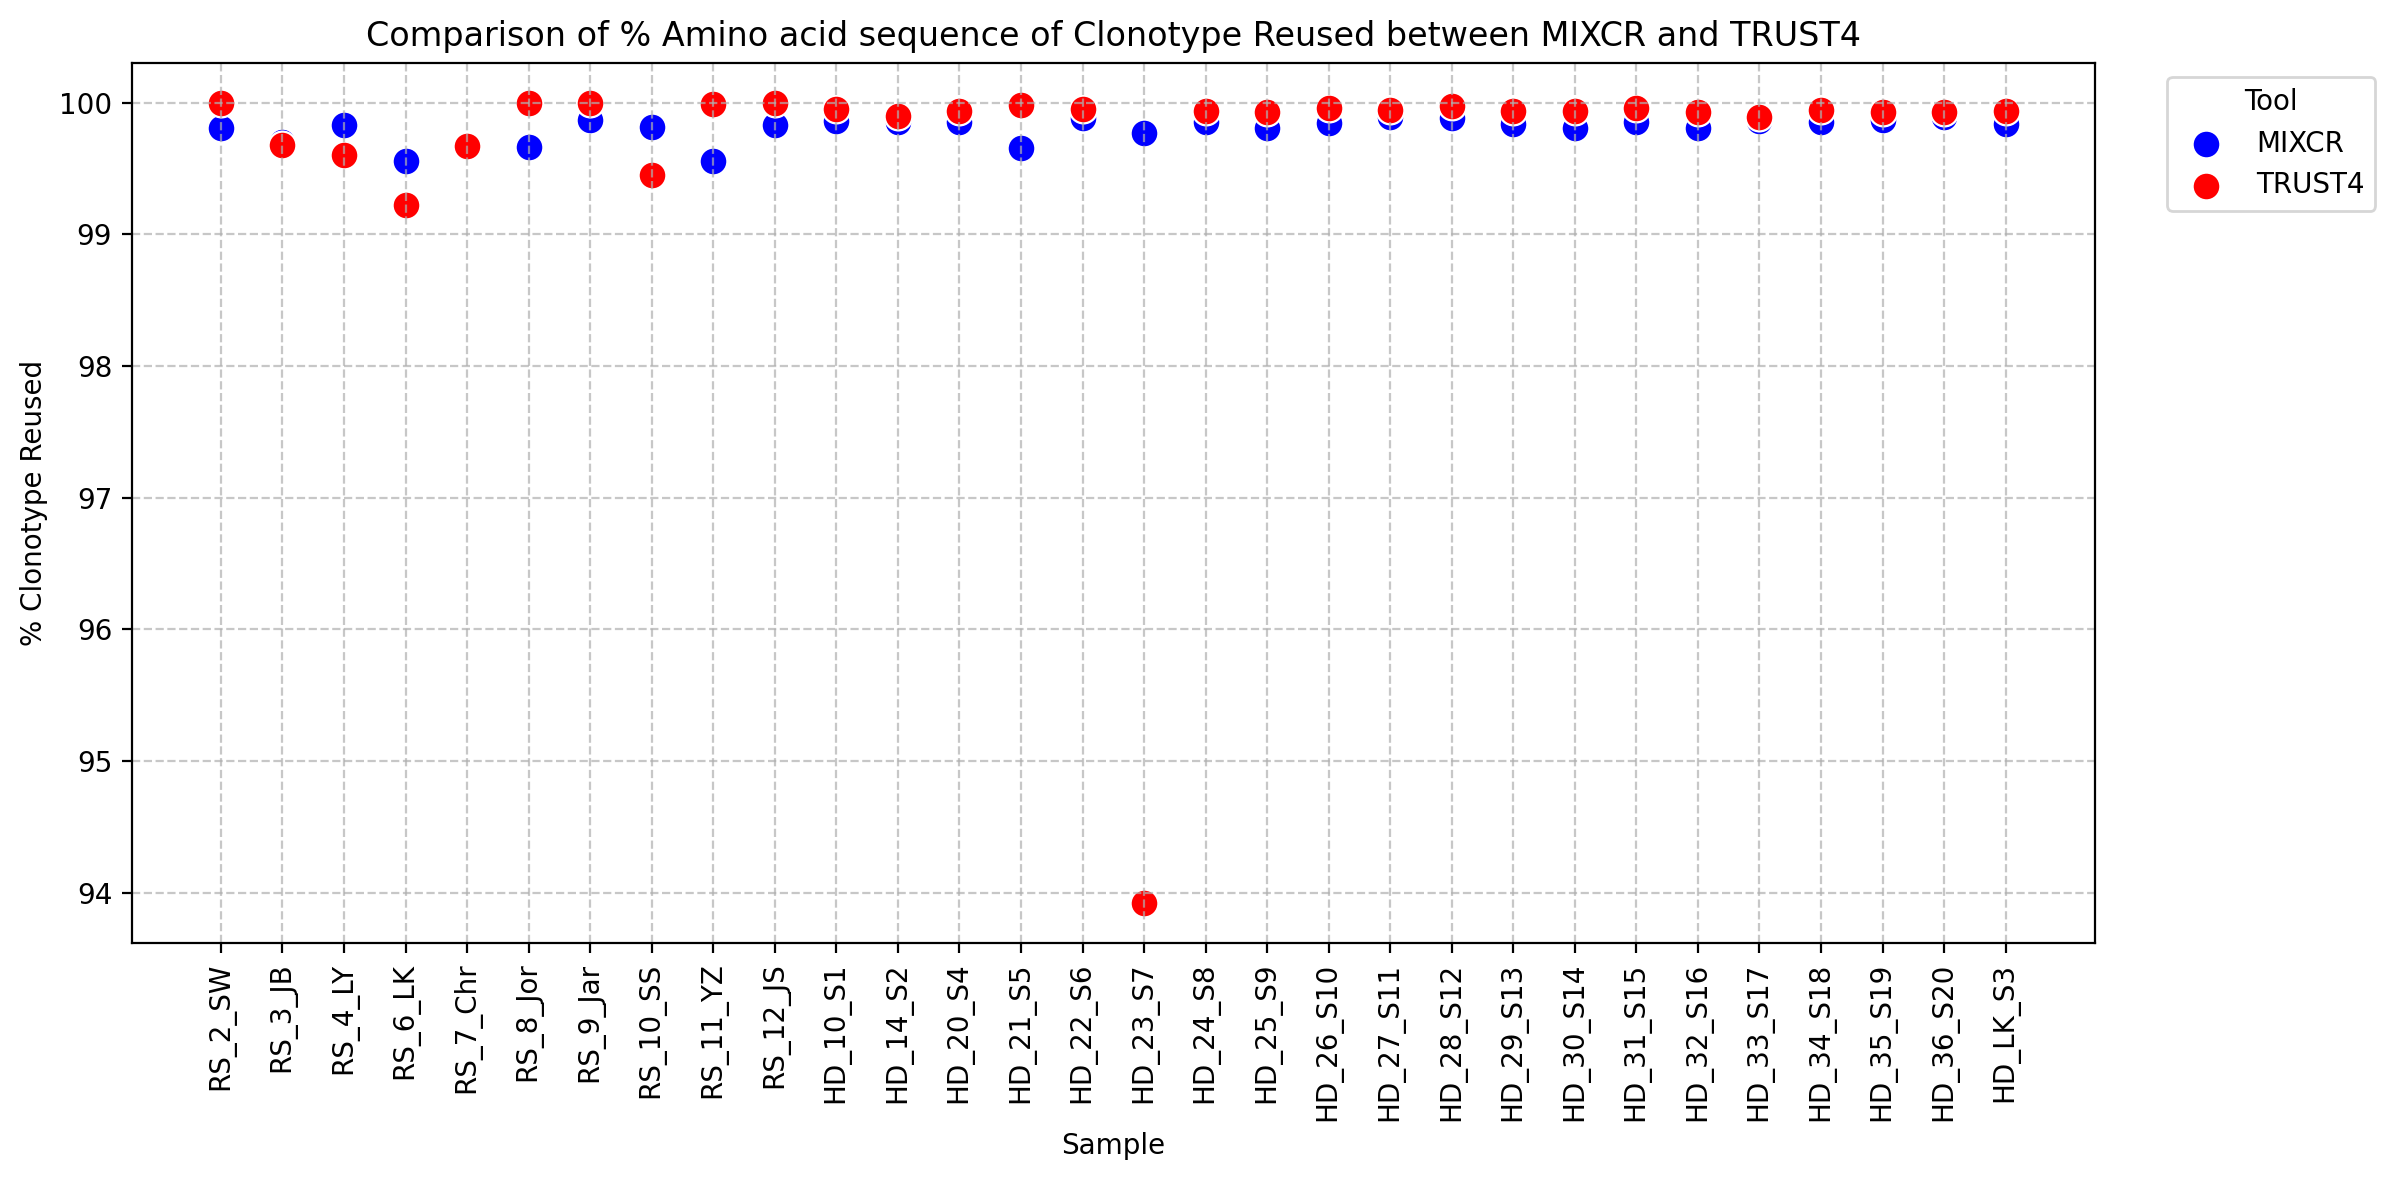

In [39]:
merged_df_AA = pd.merge(results_df_AA_MIXCR, results_aa_df_TRUST4, on='Sample', how='inner')
merged_df_AA.rename(columns={'%Clonotype_AA_Reused_MIXCR': 'MIXCR_AA', '%Clonotype_AA_Reused': 'TRUST4_AA'}, inplace=True)
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the data for MIXCR
sns.scatterplot(data=merged_df_AA, x="Sample", y="MIXCR_AA", label="MIXCR", color="blue", s=100)

# Plot the data for TRUST4
sns.scatterplot(data=merged_df_AA, x="Sample", y="TRUST4_AA", label="TRUST4", color="red", s=100)

# Rotate the x-axis labels for long sample names
plt.xticks(rotation=90)

# Improve plot aesthetics
plt.xlabel('Sample')
plt.ylabel('% Clonotype Reused')
plt.title('Comparison of % Amino acid sequence of Clonotype Reused between MIXCR and TRUST4')
plt.legend(title='Tool', loc='upper right', bbox_to_anchor=(1.15, 1))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Plot all all clonotype

In [2]:
#Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
Mixcr_og=pd.read_csv("/scratch1/pjaiswal/ipynb_notebooks/master_files/pyTCR_MIXCR_Public_original_all.csv", low_memory=False)
Mixcr_og['#count']=pd.to_numeric(Mixcr_og['#count'], errors='coerce')
Mixcr_og['log_count'] = np.log(Mixcr_og['#count'])
Mixcr_og['freq']=pd.to_numeric(Mixcr_og['freq'], errors='coerce')
Mixcr_og['log_freq'] = np.log(Mixcr_og['freq'])

In [10]:
Mixcr_shuffle=pd.read_csv("/scratch1/pjaiswal/ipynb_notebooks/master_files/pyTCR_MIXCR_Public_shuffle_all.csv", low_memory=False)
Mixcr_shuffle['#count']=pd.to_numeric(Mixcr_shuffle['#count'], errors='coerce')
Mixcr_shuffle['log_count'] = np.log(Mixcr_shuffle['#count'])
Mixcr_shuffle['freq']=pd.to_numeric(Mixcr_shuffle['freq'], errors='coerce')
Mixcr_shuffle['log_freq'] = np.log(Mixcr_shuffle['freq'])

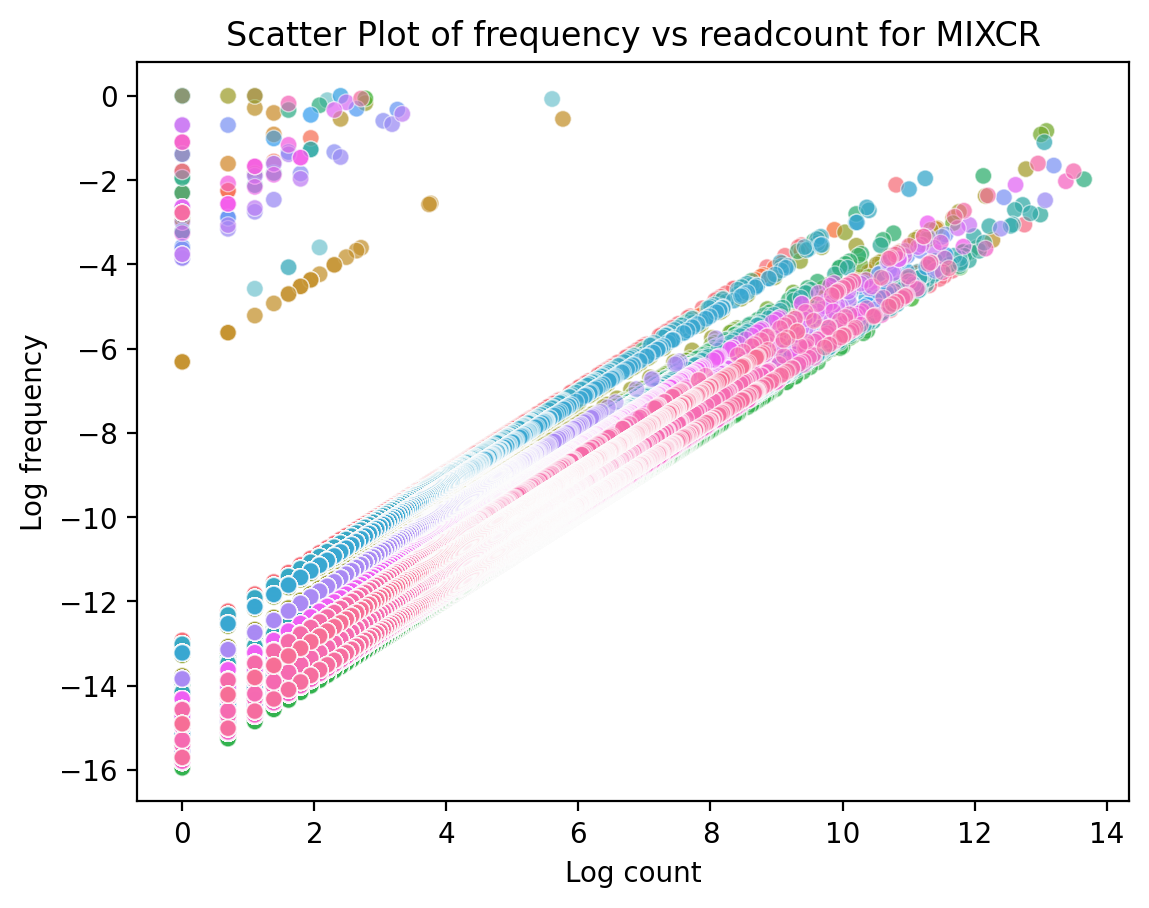

In [11]:
sns.scatterplot(x='log_count', y='log_freq', data=Mixcr_og, alpha=0.5, hue='sample', legend=False, zorder=2)
sns.scatterplot(x='log_count', y='log_freq', data=Mixcr_shuffle, hue='sample', alpha=0.5, legend=False, zorder=1)
# Add titles and labels
plt.title('Scatter Plot of frequency vs readcount for MIXCR')
plt.xlabel('Log count')
plt.ylabel('Log frequency')

# Show plot
plt.savefig('/scratch1/pjaiswal/figures/ScatterPlot_samples_Public, MIXCR.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
Mixcr_all=pd.read_csv("/scratch1/pjaiswal/ipynb_notebooks/master_files/MIXCR_Public_masterfile.csv", low_memory=False)
Mixcr_all['#count']=pd.to_numeric(Mixcr_all['#count'], errors='coerce')
Mixcr_all['log_count'] = np.log(Mixcr_all['#count'])
Mixcr_all['freq']=pd.to_numeric(Mixcr_all['freq'], errors='coerce')
Mixcr_all['log_freq'] = np.log(Mixcr_all['freq'])

In [13]:
Mixcr_all

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,Type,log_count,log_freq
0,SRR5812610_original_MIXCR,1.000000e+00,1.0,CAAPTGNSGYSTLTF,TGTGCAGCCCCGACCGGGAATTCAGGATACAGCACCCTCACCTTT,TRAV13-1*00(580),.,TRAJ11*00(260),Original_MIXCR,0.000000,0.000000
1,SRR5812610_original_MIXCR,4.704741e-02,346116.0,CASSVDREKLFF,TGTGCCAGCAGCGTTGACAGGGAAAAACTGTTTTTT,TRBV14*00(842.1),TRBD1*00(30),TRBJ1-4*00(416.8),Original_MIXCR,12.754529,-3.056600
2,SRR5812610_original_MIXCR,1.572705e-02,115700.0,CASSLGIAGAYEQYF,TGTGCCAGCAGTTTAGGGATAGCGGGAGCCTACGAGCAGTACTTC,TRBV28*00(1079.2),TRBD2*00(35),TRBJ2-7*00(439),Original_MIXCR,11.658756,-4.152373
3,SRR5812610_original_MIXCR,1.389989e-02,102258.0,CASSYRGTGELFF,TGTGCCAGCAGTTACAGGGGCACCGGGGAGCTGTTTTTT,TRBV28*00(1103.4),TRBD1*00(35),TRBJ2-2*00(459.5),Original_MIXCR,11.535254,-4.275875
4,SRR5812610_original_MIXCR,1.297652e-02,95465.0,CASSRTGQGSSEQYF,TGCGCCAGCTCCCGAACGGGACAGGGATCAAGCGAGCAGTACTTC,TRBV5-1*00(893.8),TRBD1*00(50),TRBJ2-7*00(398.5),Original_MIXCR,11.466515,-4.344614
...,...,...,...,...,...,...,...,...,...,...,...
25290379,SRR5812687_shuffled_MIXCR,3.367947e-07,1.0,SASSVDGRTDTQYF,AGTGCCAGCAGCGTAGACGGGAGGACAGATACCCAGTATTTT,TRBV9*00(891),.,TRBJ2-3*00(422),Shuffle_MIXCR,0.000000,-14.903792
25290380,SRR5812687_shuffled_MIXCR,3.367947e-07,1.0,SASSADVRVENLFF,AGTGCCAGCAGCGCCGACGTCAGGGTCGAAAACCTGTTTTTT,TRBV9*00(1091),TRBD1*00(25),TRBJ1-4*00(391),Shuffle_MIXCR,0.000000,-14.903792
25290381,SRR5812687_shuffled_MIXCR,3.367947e-07,1.0,SASSGSGSSYTEQFF,AGTGCCAGCAGCGGTAGCGGGAGCTCCTACACTGAGCAGTTCTTC,TRBV9*00(773),TRBD2*00(25),TRBJ2-1*00(501),Shuffle_MIXCR,0.000000,-14.903792
25290382,SRR5812687_shuffled_MIXCR,3.367947e-07,1.0,SASRVAPEGTDTQYF,AGTGCCAGCAGAGTAGCGCCGGAGGGCACAGATACGCAGTATTTT,TRBV9*00(982),TRBD2*00(26),TRBJ2-3*00(470),Shuffle_MIXCR,0.000000,-14.903792


In [ ]:
sns.scatterplot(x='log_count', y='log_freq', data=Mixcr_all, alpha=0.5, hue='Type')
# Add titles and labels
plt.title('Scatter Plot of Frequency vs Read Count of Clonotypes')
plt.xlabel('Log count')
plt.ylabel('Log frequency')

# Show plot
plt.show()

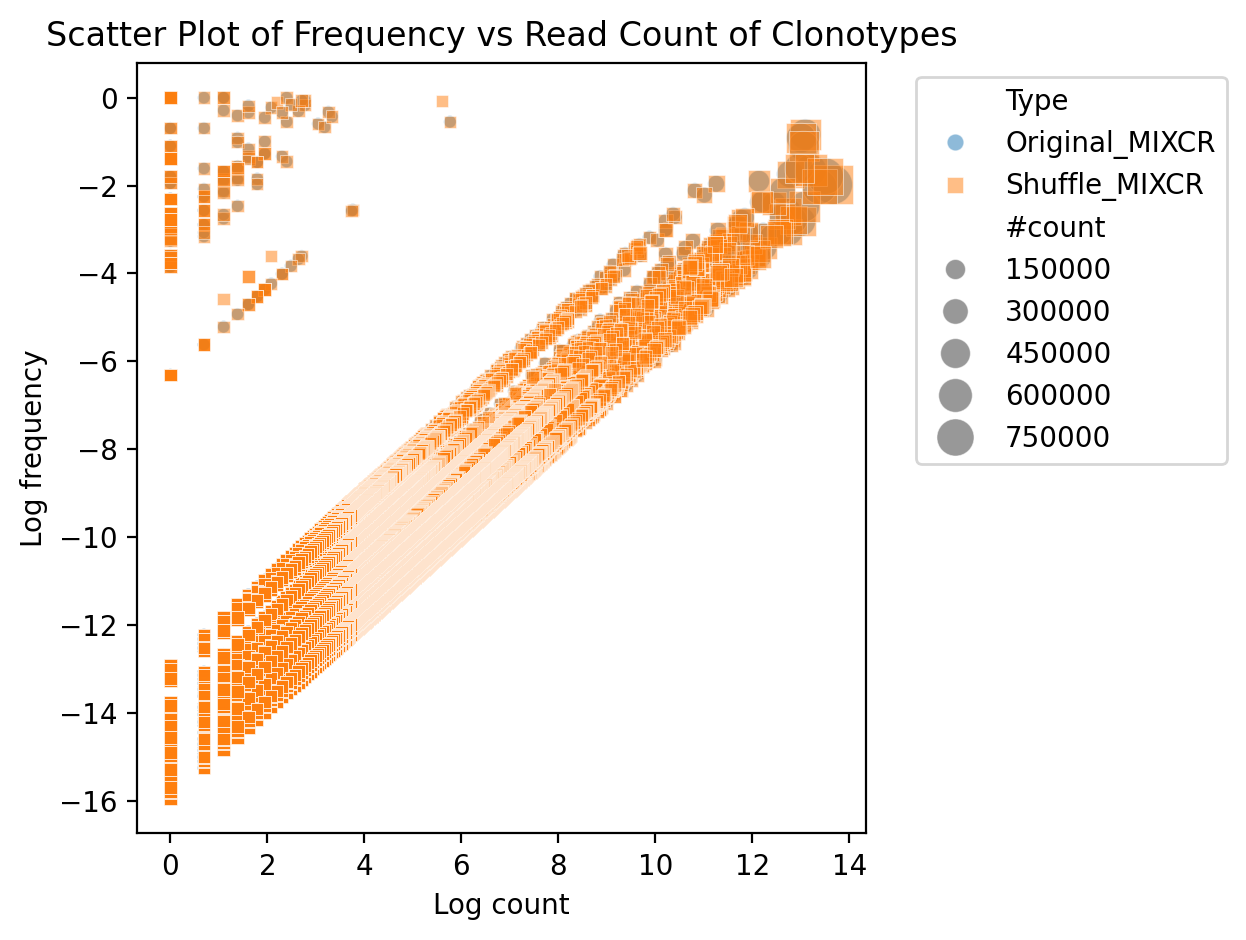

In [14]:
# Define a dictionary for different markers based on 'Type'
markers = {"Original_MIXCR": "o", "Shuffle_MIXCR": "s"}

# Plot the data with different markers and size based on count
sns.scatterplot(x='log_count', y='log_freq', data=Mixcr_all, alpha=0.5, 
                hue='Type', style='Type', markers=markers, 
                size='#count', sizes=(20, 200))

# Add titles and labels
plt.title('Scatter Plot of Frequency vs Read Count of Clonotypes')
plt.xlabel('Log count')
plt.ylabel('Log frequency')

# Move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
markers = {"Original_Mixcr": "o", "Shuffle_Mixcr": "s"}
Mixcr_all['marker_size'] = Mixcr_all.apply(lambda row: 60 if row['Type'] == 'Original_Mixcr' else 20, axis=1)

# Plot the data with different markers and sizes based on type
sns.scatterplot(x='log_count', y='log_freq', data=Mixcr_all, alpha=0.5, 
                hue='Type', style='Type', markers=markers, 
                size='marker_size', sizes=(20, 60))

# Add titles and labels
plt.title('Scatter Plot of Frequency vs Read Count of Clonotypes')
plt.xlabel('Log count')
plt.ylabel('Log frequency')

# Move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

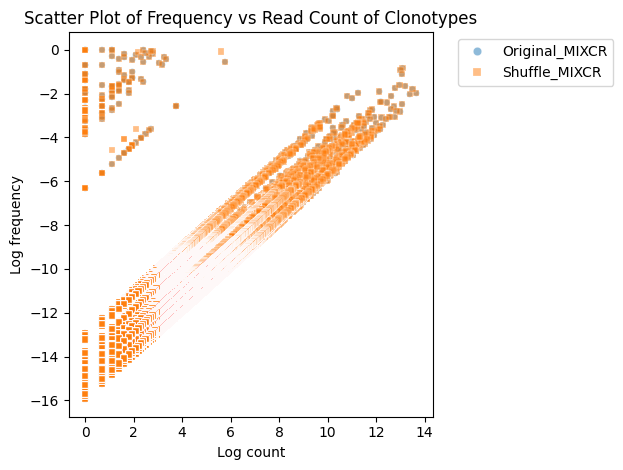

In [4]:
markers = {"Original_MIXCR": "o", "Shuffle_MIXCR": "s"}
Mixcr_all['marker_size'] = Mixcr_all.apply(lambda row: 80 if row['Type'] == 'Original_Mixcr' else 20, axis=1)

# Plot the data with different markers and sizes based on type
plot = sns.scatterplot(x='log_count', y='log_freq', data=Mixcr_all, alpha=0.5, 
                hue='Type', style='Type', markers=markers, 
                size='marker_size', sizes=(20, 80), legend='full')

# Add titles and labels
plt.title('Scatter Plot of Frequency vs Read Count of Clonotypes')
plt.xlabel('Log count')
plt.ylabel('Log frequency')

# Remove marker size from the legend
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles=handles[1:3], labels=labels[1:3], bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.savefig('/scratch1/pjaiswal/figures/ALL_Clonotype_Public_Type_MIXCR.png', dpi=300, bbox_inches='tight')
plt.show()

### 

In [2]:
TRUST4_all=pd.read_csv("/scratch1/pjaiswal/ipynb_notebooks/master_files/TRUST4_Public_masterfile.csv", low_memory=False)
TRUST4_all['#count']=pd.to_numeric(TRUST4_all['#count'], errors='coerce')
TRUST4_all['log_count'] = np.log(TRUST4_all['#count'])
TRUST4_all['freq']=pd.to_numeric(TRUST4_all['freq'], errors='coerce')
TRUST4_all['log_freq'] = np.log(TRUST4_all['freq'])

In [3]:
TRUST4_all

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,Type,log_count,log_freq
0,SRR5812610_original_TRUST4,5.816058e-02,352577,CASSVDREKLFF,TGTGCCAGCAGCGTTGACAGGGAAAAACTGTTTTTT,TRBV14*01,TRBD1*01,TRBJ1-4*01,Original_TRUST4,12.773024,-2.844547
1,SRR5812610_original_TRUST4,1.955062e-02,118518,CASSLGIAGAYEQYF,TGTGCCAGCAGTTTAGGGATAGCGGGAGCCTACGAGCAGTACTTC,TRBV28*01,TRBD1*01,TRBJ2-7*01,Original_TRUST4,11.682820,-3.934748
2,SRR5812610_original_TRUST4,1.713885e-02,103898,CASSYRGTGELFF,TGTGCCAGCAGTTACAGGGGCACCGGGGAGCTGTTTTTT,TRBV28*01,TRBD1*01,TRBJ2-2*01,Original_TRUST4,11.551165,-4.066407
3,SRR5812610_original_TRUST4,7.585944e-03,45987,CASSEGLDRESDTQYF,TGTGCCAGCAGTGAGGGGCTGGACAGGGAGAGTGATACGCAGTATTTT,TRBV2*01,TRBD1*01,TRBJ2-3*01,Original_TRUST4,10.736114,-4.881458
4,SRR5812610_original_TRUST4,5.316611e-03,32230,CSVEGGSSYEQYF,TGCAGCGTTGAAGGTGGGAGTTCCTACGAGCAGTACTTC,TRBV29-1*01,TRBD2*02,TRBJ2-7*01,Original_TRUST4,10.380653,-5.236919
...,...,...,...,...,...,...,...,...,...,...,...
40521013,SRR5812687_shuffle_TRUST4,7.420246e-07,1,CASSVGTPGLATYEQYF,TGTGCCAGCAGCGTGGGGACACCGGGACTAGCCACCTACGAGCAGT...,TRBV9*01,TRBD2*01,TRBJ2-7*01,Shuffle_TRUST4,0.000000,-14.113883
40521014,SRR5812687_shuffle_TRUST4,7.420246e-07,1,CASSSPAGRGRQETQYF,TGTGCCAGCAGCTCTCCTGCTGGGCGGGGGCGGCAAGAGACCCAGT...,TRBV9*01,TRBD2*01,TRBJ2-5*01,Shuffle_TRUST4,0.000000,-14.113883
40521015,SRR5812687_shuffle_TRUST4,7.420246e-07,1,CGSSVDGAEETQYF,TGTGGCAGCAGCGTAGACGGAGCGGAAGAGACCCAGTACTTC,TRBV9*01,TRBD2*02,TRBJ2-5*01,Shuffle_TRUST4,0.000000,-14.113883
40521016,SRR5812687_shuffle_TRUST4,7.420246e-07,1,CASSVAAGNGNTLYF,TGTGCCAGCAGCGTAGCGGCAGGGAATGGAAACACCCTATATTTT,TRBV9*01,TRBD2*02,TRBJ1-3*01,Shuffle_TRUST4,0.000000,-14.113883


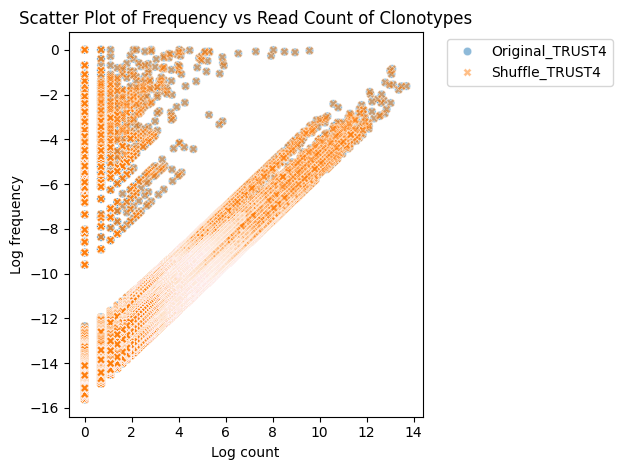

In [8]:
# Plot the data with different markers and sizes based on type
plot = sns.scatterplot(x='log_count', y='log_freq', data=TRUST4_all, alpha=0.5, 
                hue='Type', style='Type')

# Add titles and labels
plt.title('Scatter Plot of Frequency vs Read Count of Clonotypes')
plt.xlabel('Log count')
plt.ylabel('Log frequency')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.savefig('/scratch1/pjaiswal/figures/ALL_Clonotype_Public_Type_TRUST4.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
TRUST4_og =pd.read_csv("/scratch1/pjaiswal/ipynb_notebooks/master_files/pyTCR_TRUST4_Public_original_all.csv", low_memory=False)
TRUST4_og['#count']= pd.to_numeric(TRUST4_og['#count'], errors='coerce')
TRUST4_og['log_count'] = np.log(TRUST4_og['#count'])
TRUST4_og['freq']= pd.to_numeric(TRUST4_og['freq'], errors='coerce')
TRUST4_og['log_freq'] = np.log(TRUST4_og['freq'])

In [ ]:
TRUST4_shuffle= pd.read_csv("/scratch1/pjaiswal/ipynb_notebooks/master_files/pyTCR_TRUST4_Public_shuffle_all.csv", low_memory=False)
TRUST4_shuffle['#count']=pd.to_numeric(TRUST4_shuffle['#count'], errors='coerce')
TRUST4_shuffle['log_count'] = np.log(TRUST4_shuffle['#count'])
TRUST4_shuffle['freq']=pd.to_numeric(TRUST4_shuffle['freq'], errors='coerce')
TRUST4_shuffle['log_freq'] = np.log(TRUST4_shuffle['freq'])

In [ ]:
sns.scatterplot(x='log_count', y='log_freq', data=TRUST4_og, alpha=0.5, hue='sample', legend=False, zorder=2)
sns.scatterplot(x='log_count', y='log_freq', data=TRUST4_shuffle, hue='sample', alpha=0.5, legend=False, zorder=5)
# Add titles and labels
plt.title('Scatter Plot of frequency vs readcount for MIXCR')
plt.xlabel('Log count')
plt.ylabel('Log frequency')

# Show plot
plt.savefig('/scratch1/pjaiswal/figures/ScatterPlot_samples_Public_TRUST4.png', dpi=300, bbox_inches='tight')
plt.show()